# EXPLORATION
# 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명? [프로젝트]

## 2-1. 프로젝트1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요

In [153]:
from sklearn.datasets import load_diabetes

- diatbetes의 data를 df_X에, target을 df_y에 저장해주세요

In [154]:
df = load_diabetes()
df_X = df.data
df_y = df.target

In [155]:
print(df_X.shape)

(442, 10)


In [156]:
print(df_y.shape)

(442,)


(2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요

In [157]:
type(df_X)

numpy.ndarray

(3) 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요

In [158]:
type(df_y)

numpy.ndarray

(4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


(5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요

In [160]:
import numpy as np
W = np.random.rand(10)  # 입력 데이터의 feature가 10개이므로 W = 10
b = np.random.rand()

In [161]:
W

array([0.35897472, 0.60071323, 0.4338936 , 0.27261953, 0.13344278,
       0.58393288, 0.63583499, 0.27609708, 0.14957077, 0.71641131])

In [162]:
b

0.9363651907523929

- 모델 함수를 구현해주세요

In [163]:
def model(X, W, b):
    predictions = 0
    for i in range(10): # X의 feature가 10이므로
        predictions += X[:, i] * W[i]   # Xi * W
    predictions += b    # (∑Xi * W) + b
    return predictions

(6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요

In [164]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [165]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요

In [166]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate를 설정해주세요

In [167]:
LEARNING_RATE = 0.0001  # 초기값 0.0001

(9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요

In [168]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print(f'Iter{i}: Loss{L}')

Iter10: Loss29324.26748327665
Iter20: Loss29231.33075355935
Iter30: Loss29138.764754688083
Iter40: Loss29046.568006543406
Iter50: Loss28954.73903491519
Iter60: Loss28863.276371479013
Iter70: Loss28772.178553772705
Iter80: Loss28681.444125172922
Iter90: Loss28591.07163487183
Iter100: Loss28501.0596378539
Iter110: Loss28411.40669487277
Iter120: Loss28322.11137242821
Iter130: Loss28233.172242743192
Iter140: Loss28144.587883741042
Iter150: Loss28056.356879022667
Iter160: Loss27968.47781784391
Iter170: Loss27880.949295092927
Iter180: Loss27793.769911267776
Iter190: Loss27706.93827245394
Iter200: Loss27620.452990302063
Iter210: Loss27534.312682005733
Iter220: Loss27448.51597027934
Iter230: Loss27363.061483336023
Iter240: Loss27277.94785486575
Iter250: Loss27193.173724013413
Iter260: Loss27108.73773535709
Iter270: Loss27024.638538886305
Iter280: Loss26940.87478998046
Iter290: Loss26857.44514938733
Iter300: Loss26774.348283201565
Iter310: Loss26691.582862843417
Iter320: Loss26609.14756503742
I

- 만약 학습이 잘 되지 않는다면 learning rate 값을 한 번 여러 가지로 설정하며 실험해 보세요
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.

In [169]:
LEARNING_RATE = 0.05

In [170]:
losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print(f'Iter{i}: Loss{L}')

Iter1000: Loss4006.1151195120965
Iter2000: Loss3443.2184558110234
Iter3000: Loss3214.71885291727
Iter4000: Loss3094.1085081663164
Iter5000: Loss3022.9225009321804
Iter6000: Loss2979.0540804554967
Iter7000: Loss2951.429709055014
Iter8000: Loss2933.754288353998
Iter9000: Loss2922.274085507409
Iter10000: Loss2914.7028852649805
Iter11000: Loss2909.6292469331356
Iter12000: Loss2906.171551392084
Iter13000: Loss2903.7727983860464
Iter14000: Loss2902.0769805064333
Iter15000: Loss2900.853844224358
Iter16000: Loss2899.952658289617
Iter17000: Loss2899.273531986368
Iter18000: Loss2898.74944588182
Iter19000: Loss2898.334879995047
Iter20000: Loss2897.998542049945
Iter21000: Loss2897.718667559125
Iter22000: Loss2897.4799485976055
Iter23000: Loss2897.2715041979154
Iter24000: Loss2897.0855237114656
Iter25000: Loss2896.9163495322537
Iter26000: Loss2896.7598497679287
Iter27000: Loss2896.6129843645253
Iter28000: Loss2896.473501743694
Iter29000: Loss2896.3397244729235
Iter30000: Loss2896.21039634346
Iter31

- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

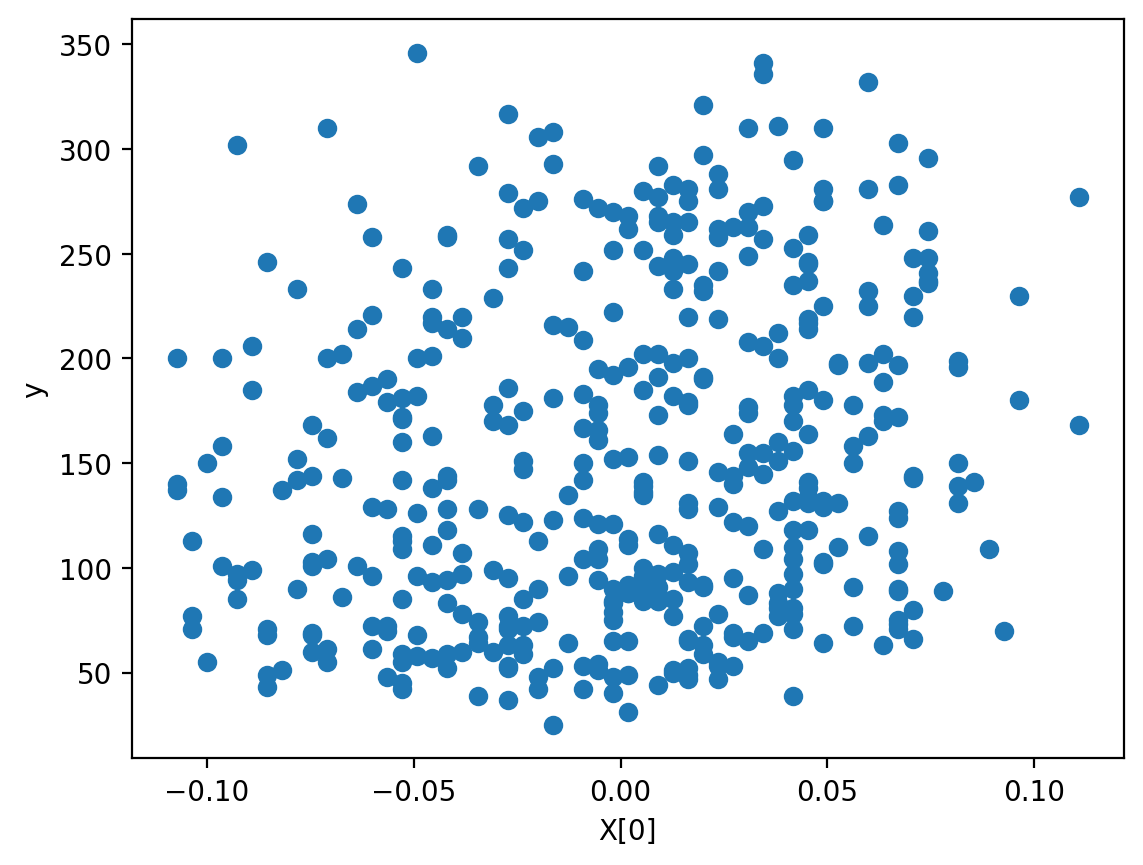

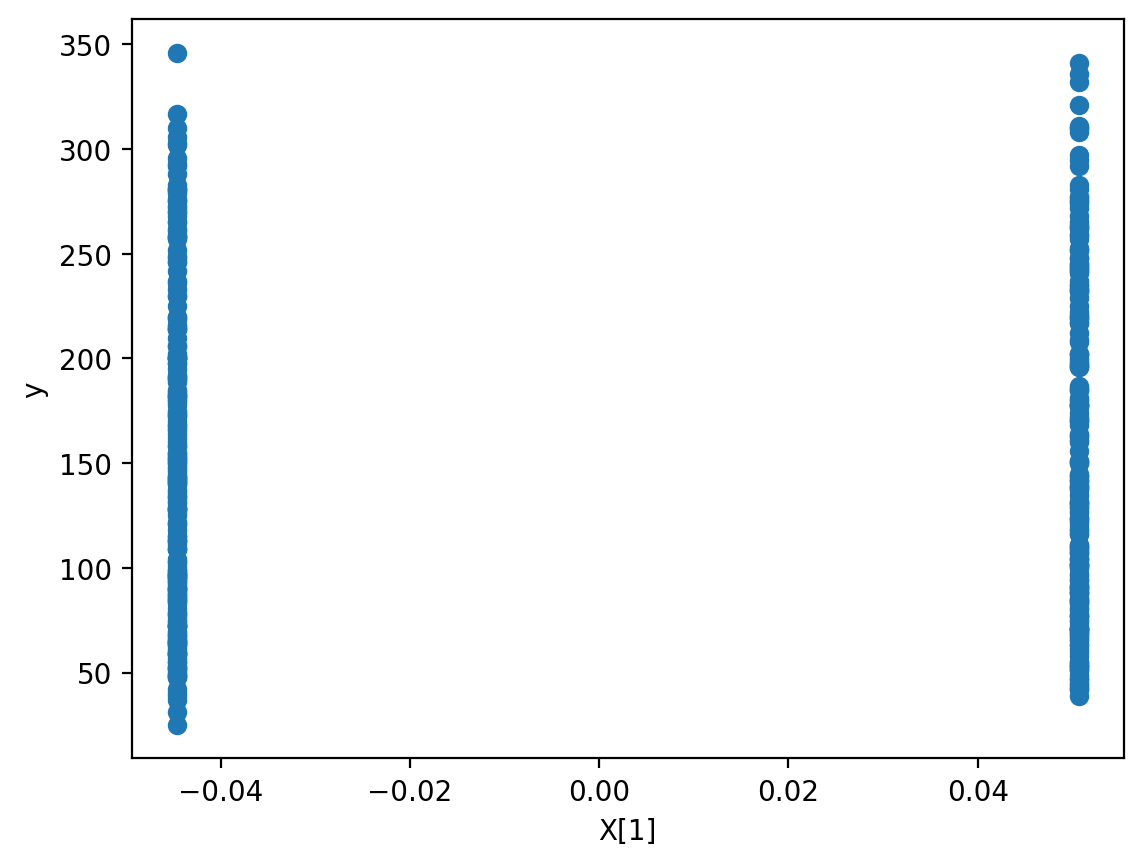

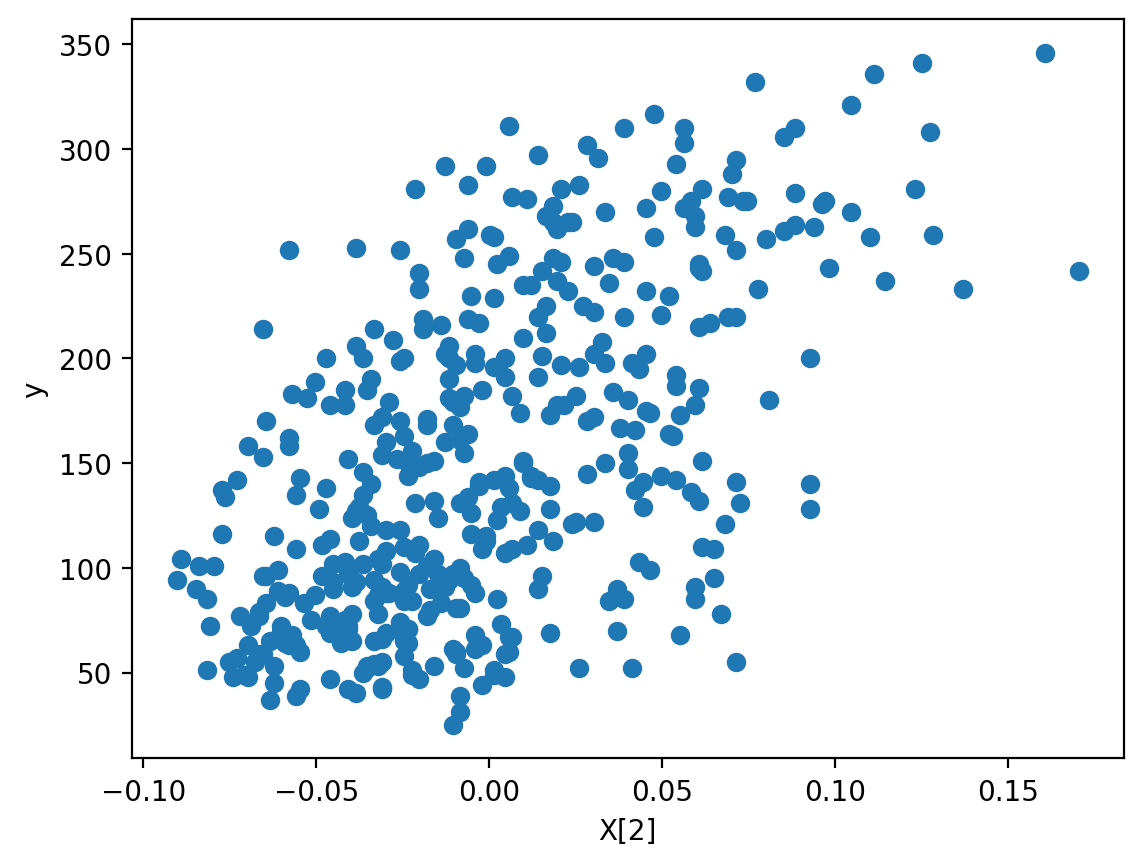

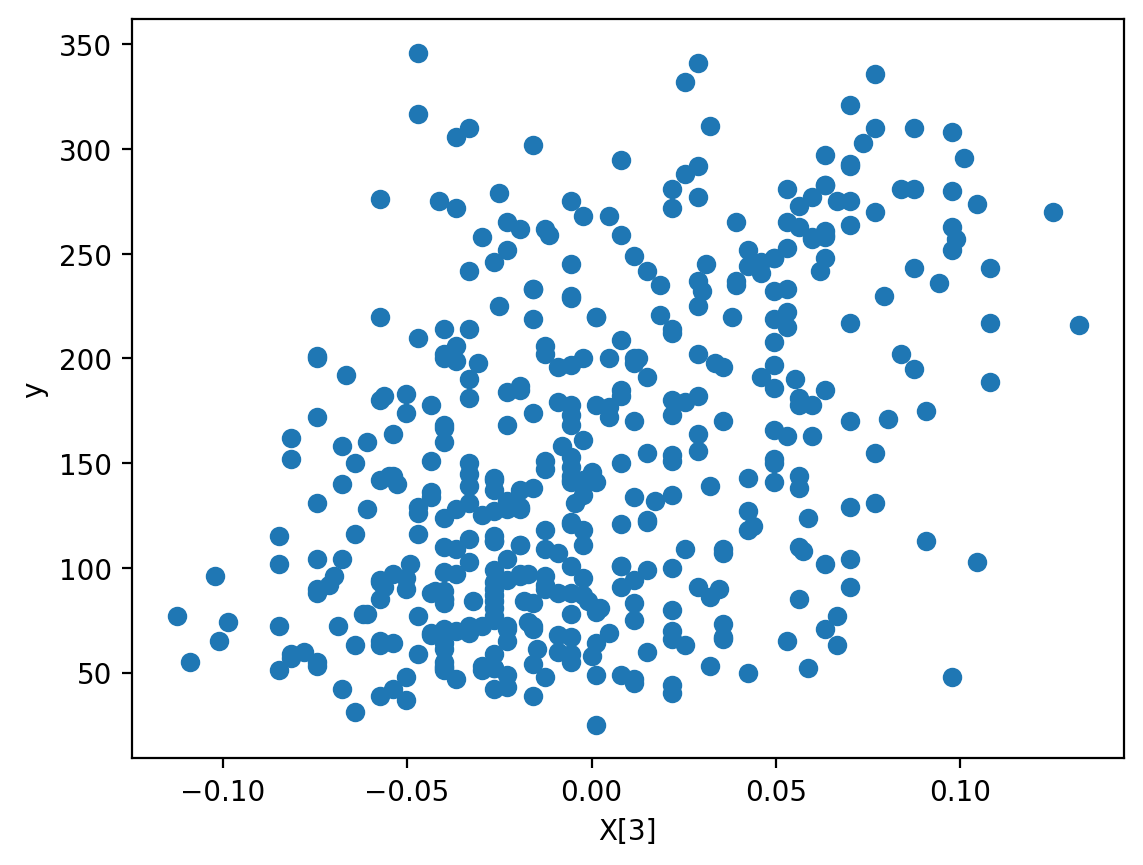

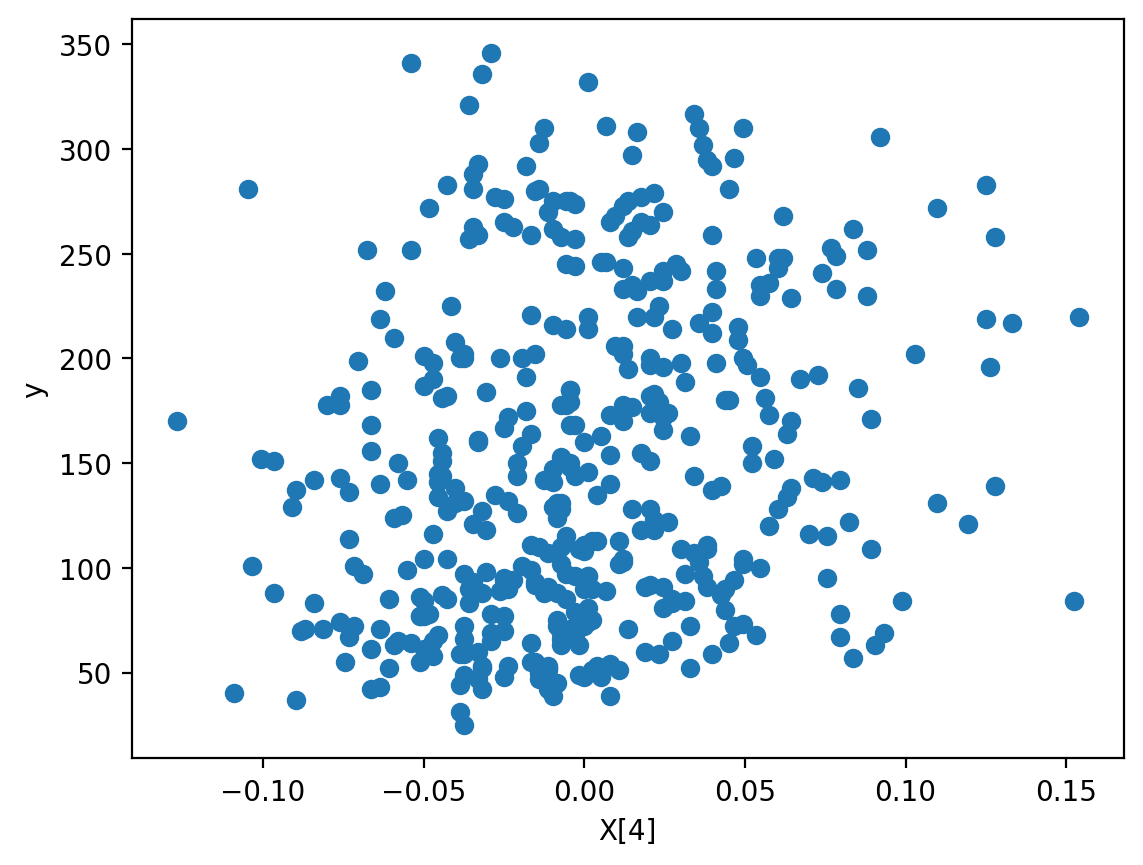

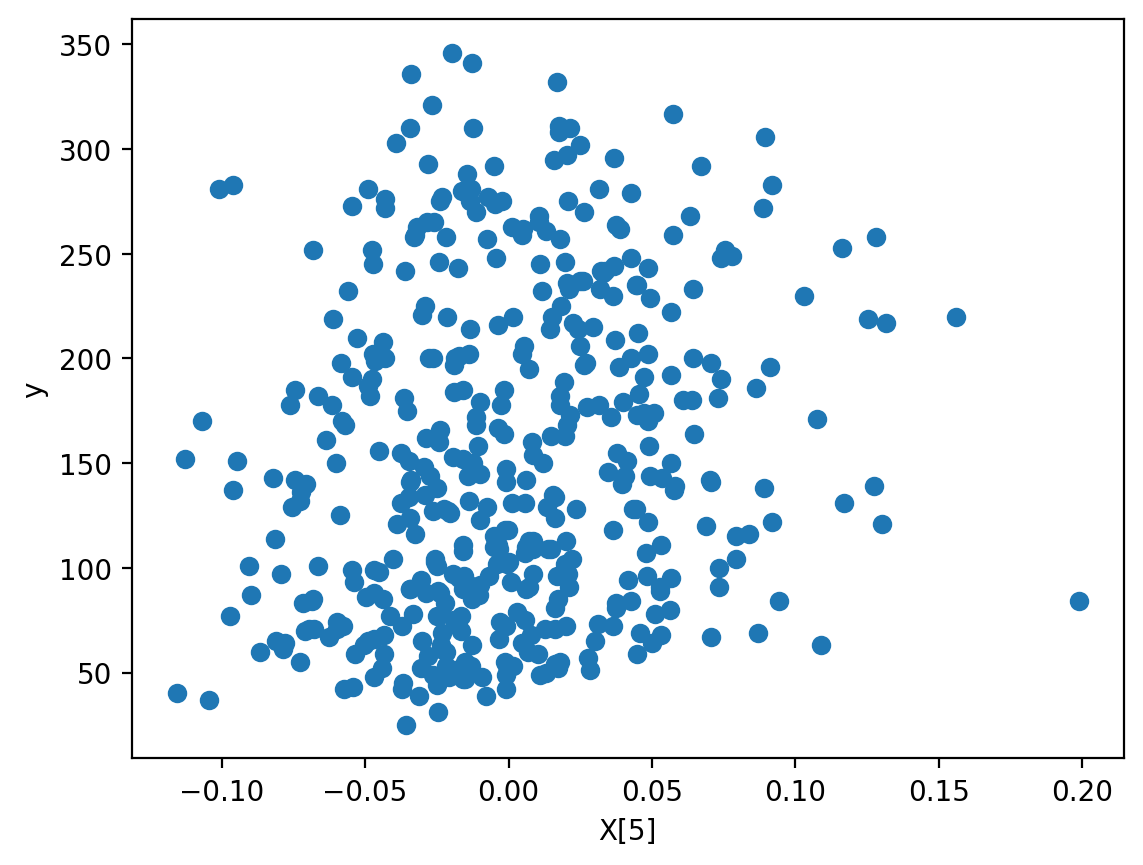

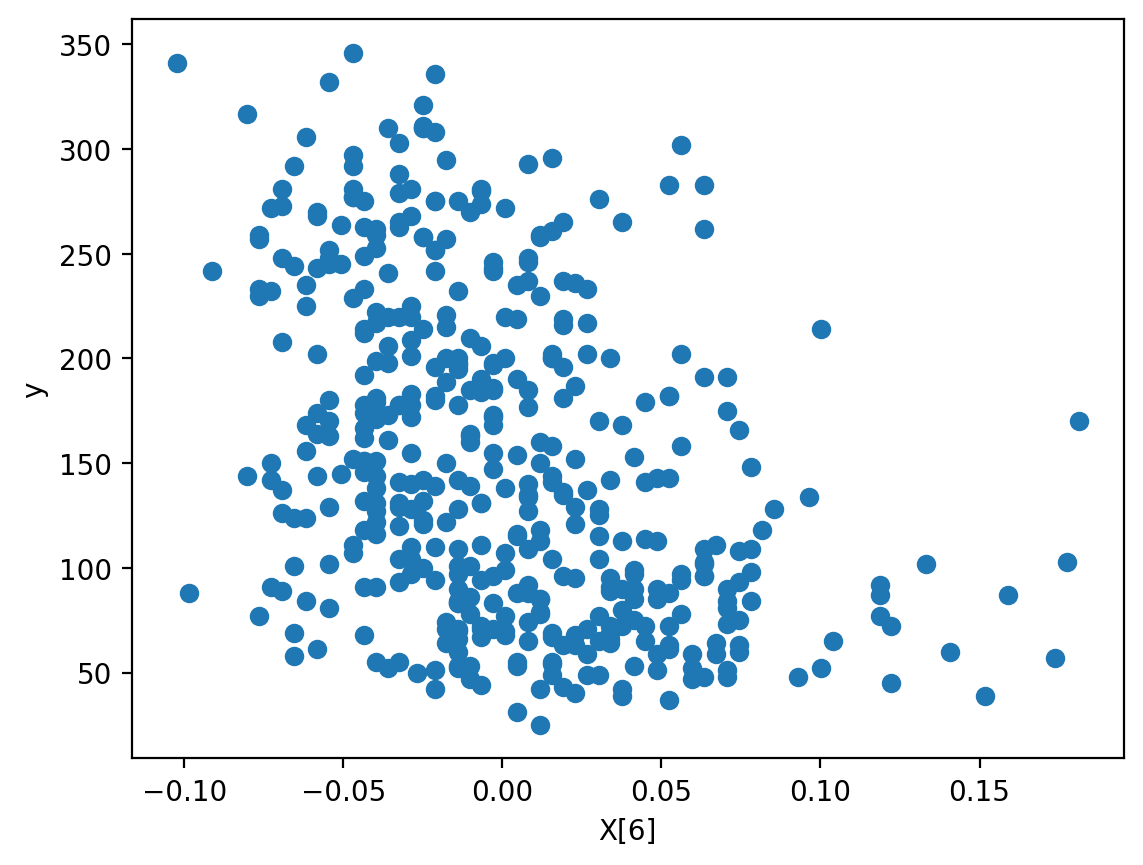

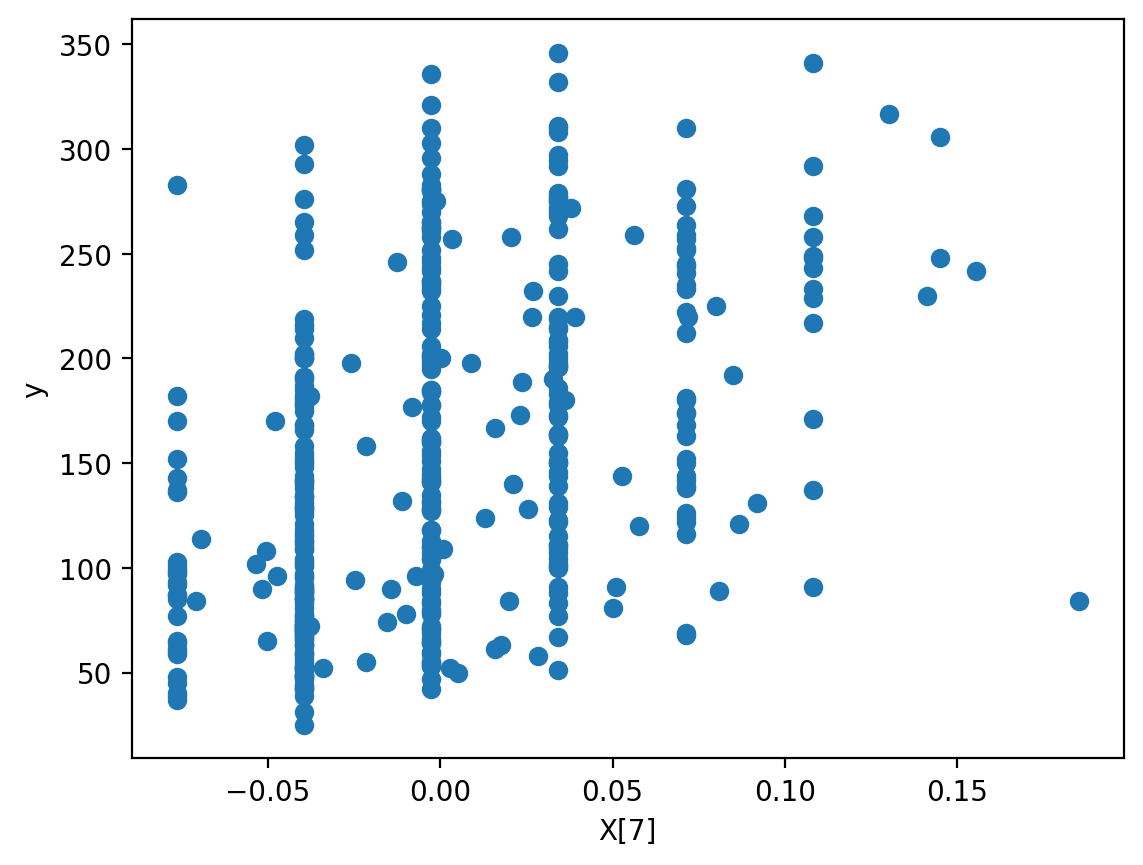

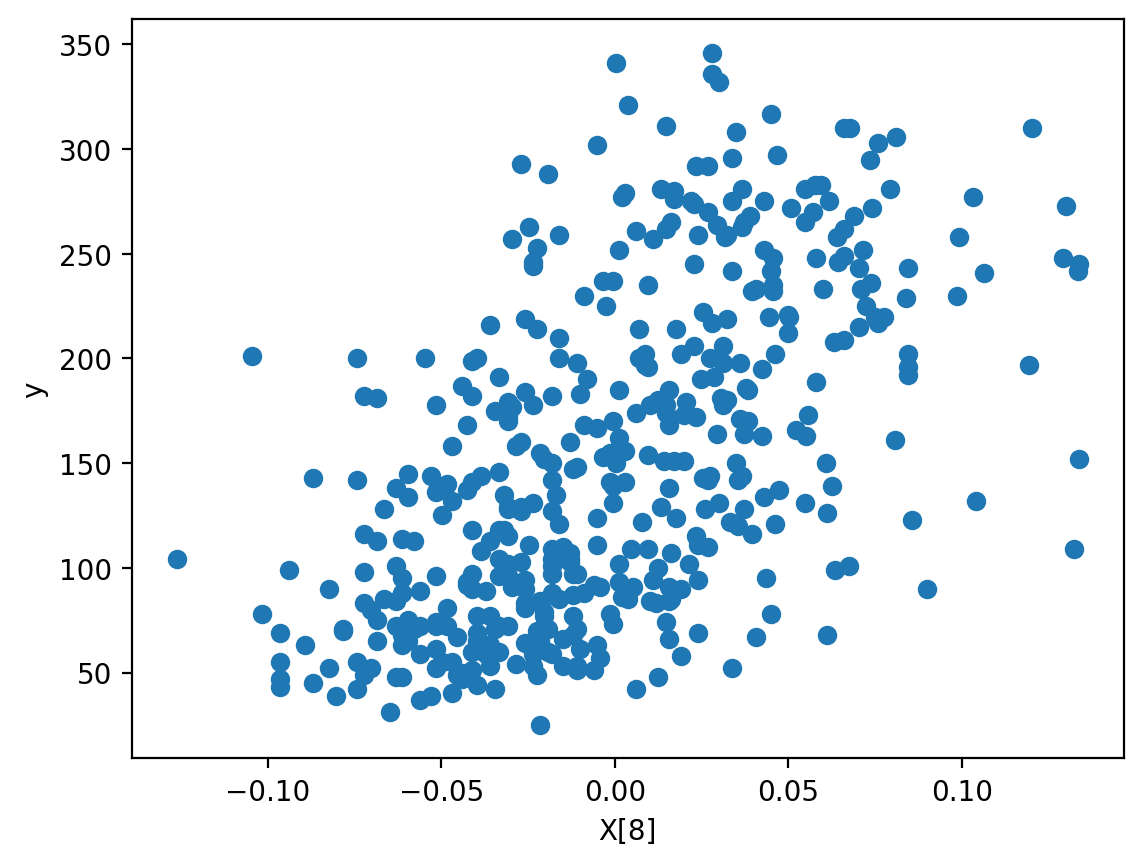

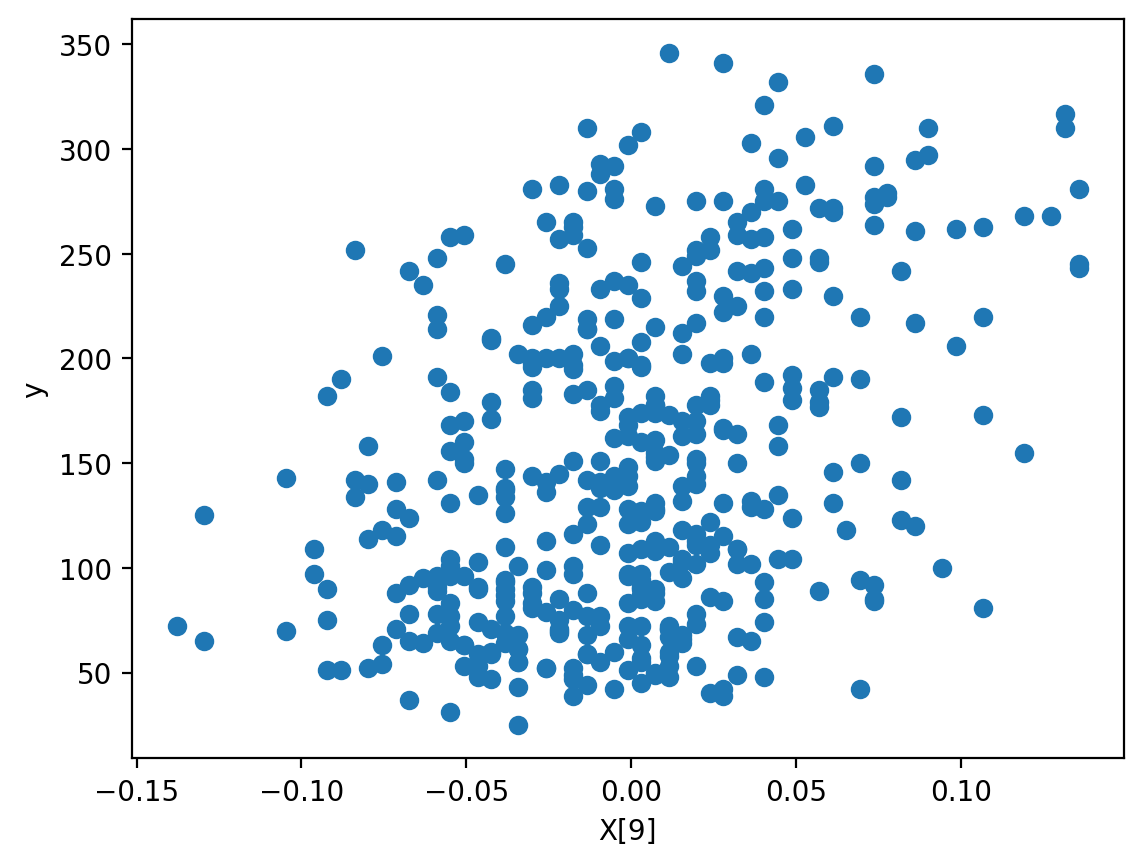

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

for i in range(10):
    plt.scatter(df_X[:, i], df_y)
    plt.xlabel(f'X[{i}]')
    plt.ylabel(f'y')
    plt.show()

간단하게 1, 4, 5, 7번 feature를 제거하고 학습해보자.

In [188]:
from sklearn.datasets import load_diabetes
import numpy as np
feature_num = 7

df = load_diabetes()
df_X = df.data
df_y = df.target

df_X = np.delete(df_X, (0, 4, 5), axis=1)# 0, 4, 5번 컬럼 삭제

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 7) (353,)
(89, 7) (89,)


In [190]:
W = np.random.rand(feature_num)  # 입력 데이터의 feature가 6개이므로 W = 6
b = np.random.rand()

In [191]:
def model(X, W, b):
    predictions = 0
    for i in range(feature_num): # X의 feature가 6이므로
        predictions += X[:, i] * W[i]   # Xi * W
    predictions += b    # (∑Xi * W) + b
    return predictions

In [192]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [193]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [194]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [195]:
LEARNING_RATE = 0.005
losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print(f'Iter{i}: Loss{L}')

Iter1000: Loss5713.787946679129
Iter2000: Loss5411.026824220809
Iter3000: Loss5146.194561848382
Iter4000: Loss4914.3243889700825
Iter5000: Loss4711.109898241422
Iter6000: Loss4532.816736150567
Iter7000: Loss4376.206159603312
Iter8000: Loss4238.468829970666
Iter9000: Loss4117.167472452695
Iter10000: Loss4010.1872125809614
Iter11000: Loss3915.69256098216
Iter12000: Loss3832.0901554655566
Iter13000: Loss3757.9964889407493
Iter14000: Loss3692.2099551003803
Iter15000: Loss3633.686633362341
Iter16000: Loss3581.5193121174334
Iter17000: Loss3534.9193164815415
Iter18000: Loss3493.200764900573
Iter19000: Loss3455.766929309013
Iter20000: Loss3422.0984171444206
Iter21000: Loss3391.74293127585
Iter22000: Loss3364.306396597775
Iter23000: Loss3339.4452703515326
Iter24000: Loss3316.8598777512166
Iter25000: Loss3296.2886357192983
Iter26000: Loss3277.503045919735
Iter27000: Loss3260.3033541944683
Iter28000: Loss3244.5147872936045
Iter29000: Loss3229.984289725996
Iter30000: Loss3216.5776938935674
Iter310

(10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요

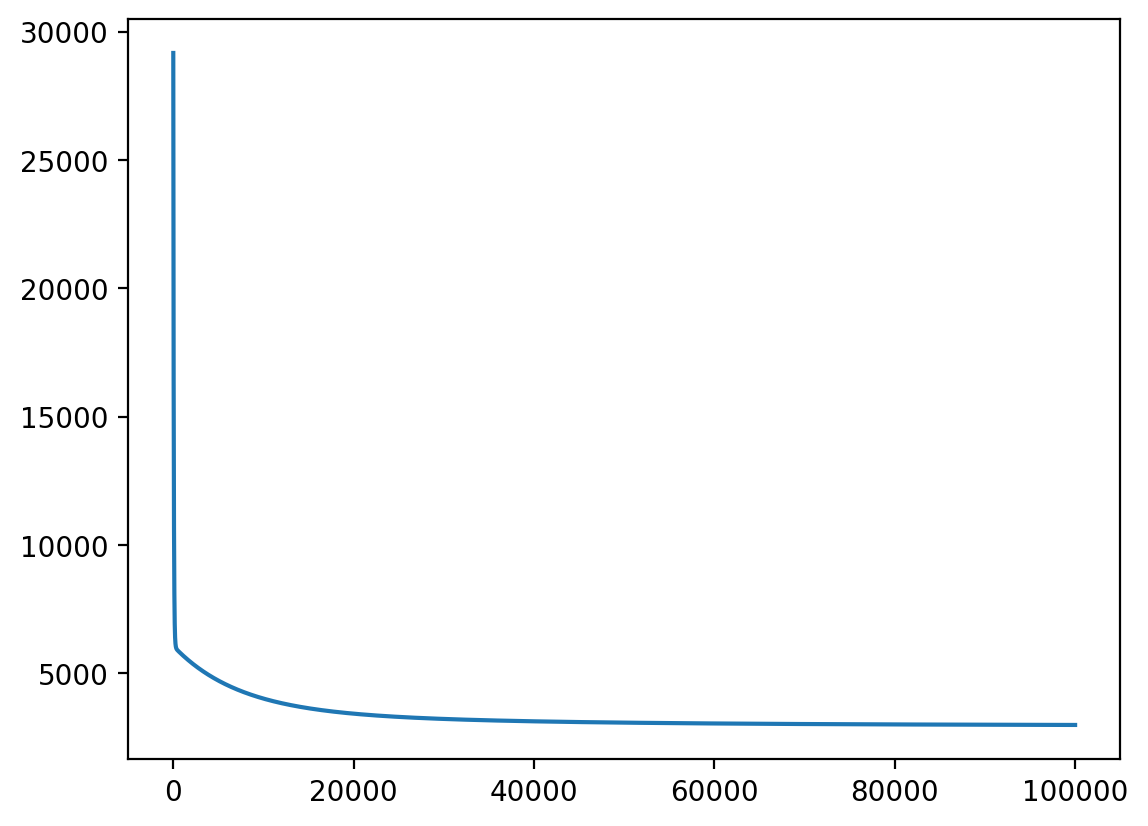

In [196]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [197]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2794.535604548867

(11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요

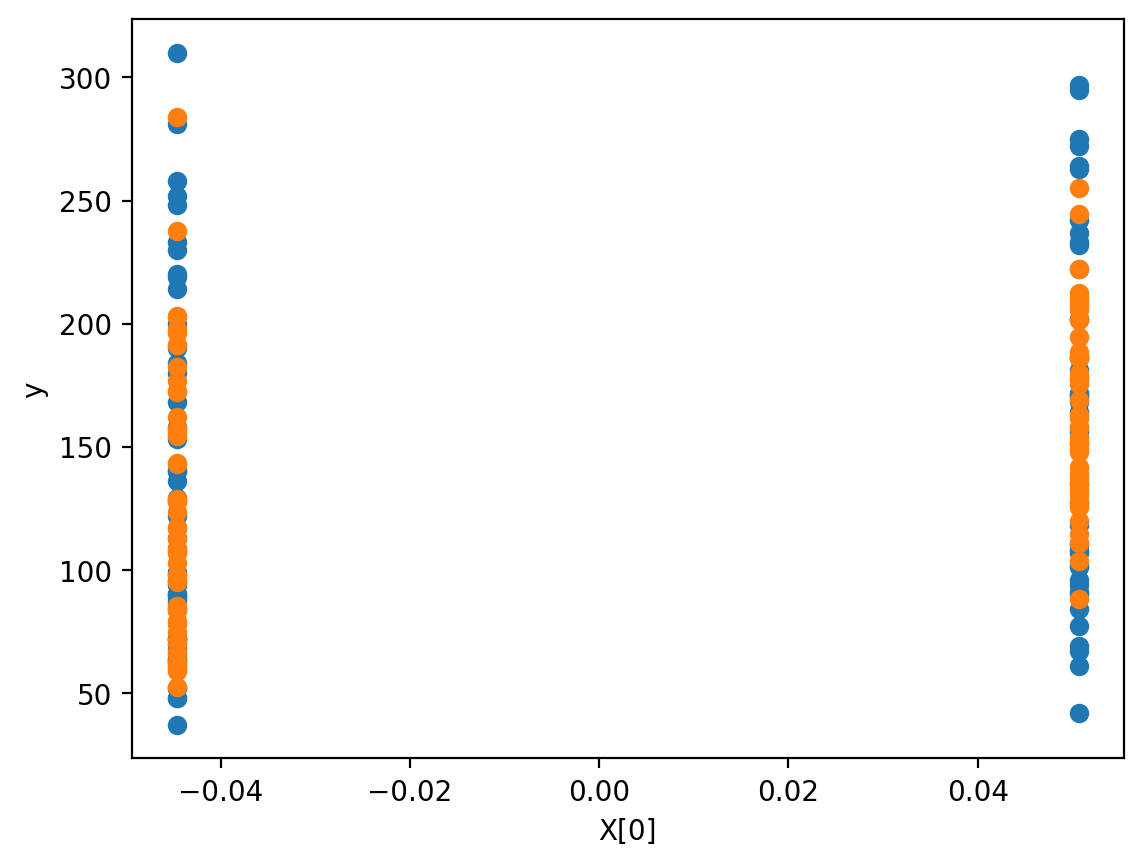

In [204]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.xlabel(f'X[0]')
plt.ylabel(f'y')
plt.show()

## 2-2. 프로젝트2: 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

(1) 데이터 가져오기

In [205]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/aiffel/aiffel_project/data/bike-sharing-demand

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/aiffel/aiffel_project/data/bike-sharing-demand


In [206]:
import pandas as pd

bike_df = pd.read_csv('train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [207]:
bike_df["datetime"] = pd.to_datetime(bike_df["datetime"])
bike_df["year"] = bike_df["datetime"].dt.year
bike_df["month"] = bike_df["datetime"].dt.month
bike_df["day"] = bike_df["datetime"].dt.day
bike_df["hour"] = bike_df["datetime"].dt.hour
bike_df["minute"] = bike_df["datetime"].dt.minute
bike_df["second"] = bike_df["datetime"].dt.second

In [208]:
bike_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기

<Axes: xlabel='second', ylabel='count'>

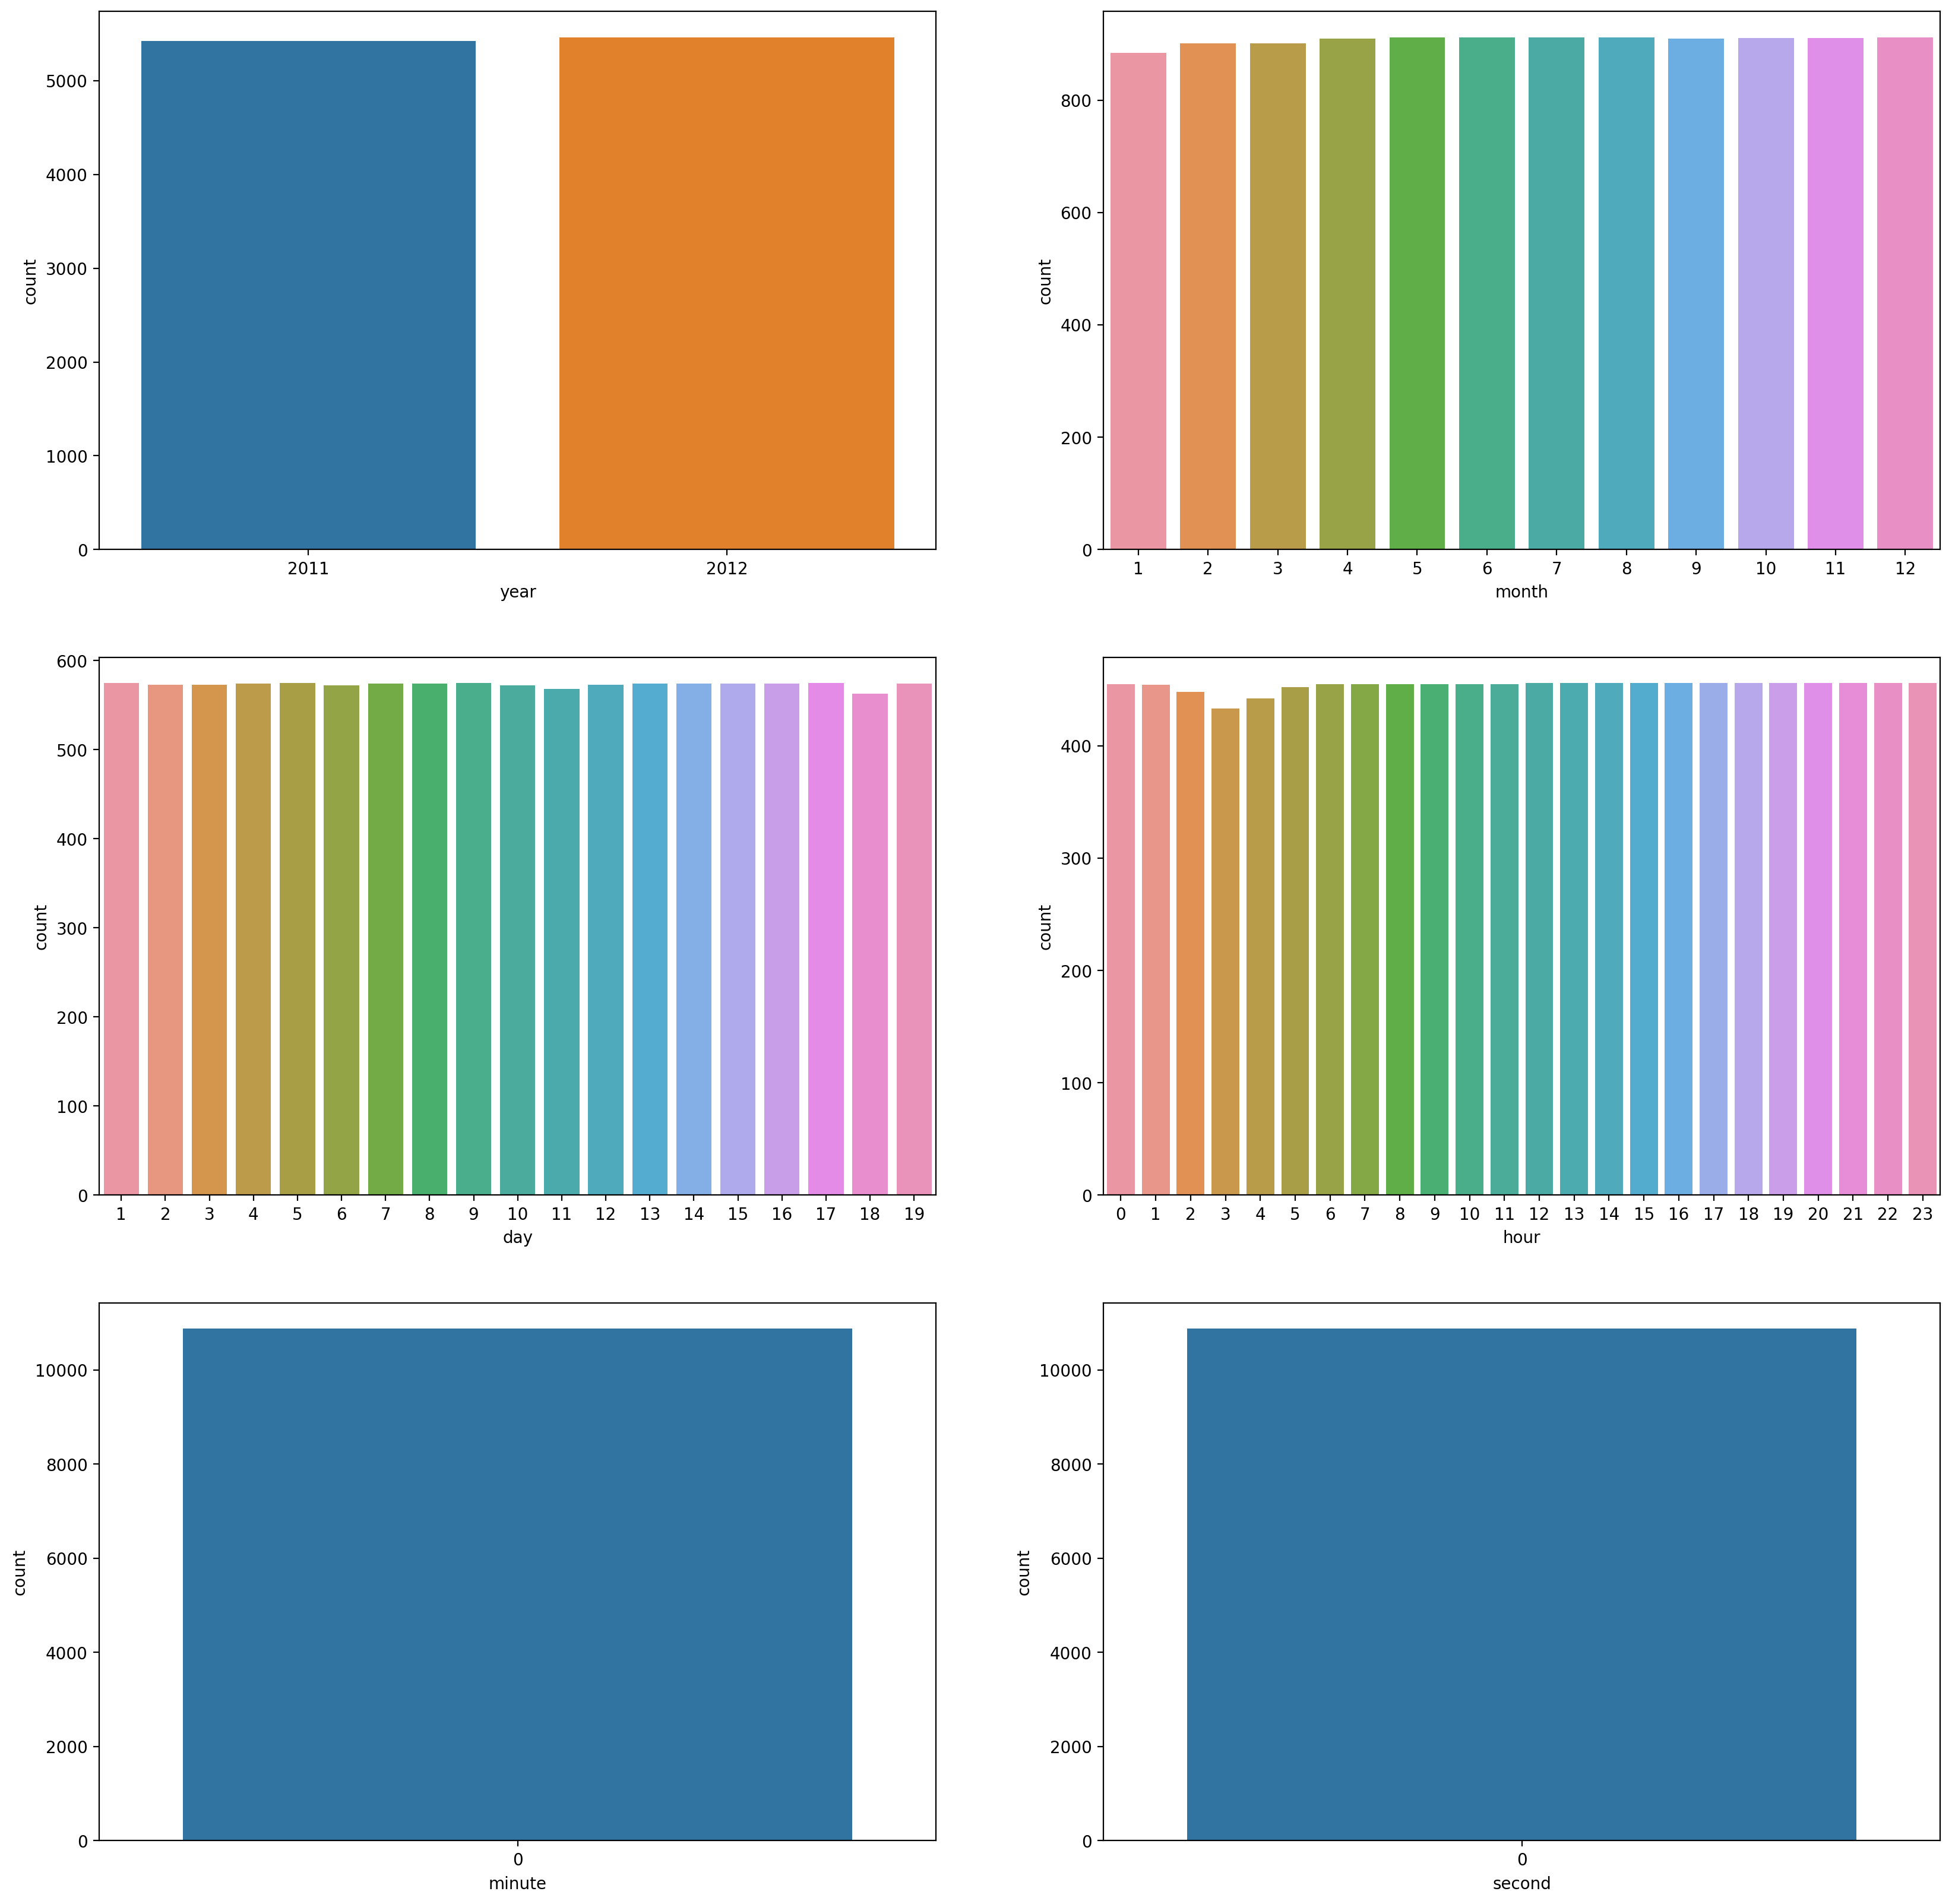

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 20))
sns.countplot(x="year", data=bike_df, ax=ax[0, 0])
sns.countplot(x="month", data=bike_df, ax=ax[0, 1])
sns.countplot(x="day", data=bike_df, ax=ax[1, 0])
sns.countplot(x="hour", data=bike_df, ax=ax[1, 1])
sns.countplot(x="minute", data=bike_df, ax=ax[2, 0])
sns.countplot(x="second", data=bike_df, ax=ax[2, 1])

(4) X, y 컬럼 선택 및 train/test 데이터 분리

In [210]:
bike_df_new = bike_df

- count의 예측에 casual, registered 컬럼은 필요 없을 것이다
- minute, second는 전부 0이기 때문에 의미가 없을 것이다
- datetime은 이미 6개의 컬럼으로 나눴기 때문에 제외했다

In [211]:
bike_df_new = bike_df_new.drop(['casual', 'registered', 'datetime', 'minute', 'second'], axis=1)
bike_df_new.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


- 계절은 count와 관련이 있다

<Axes: xlabel='season'>

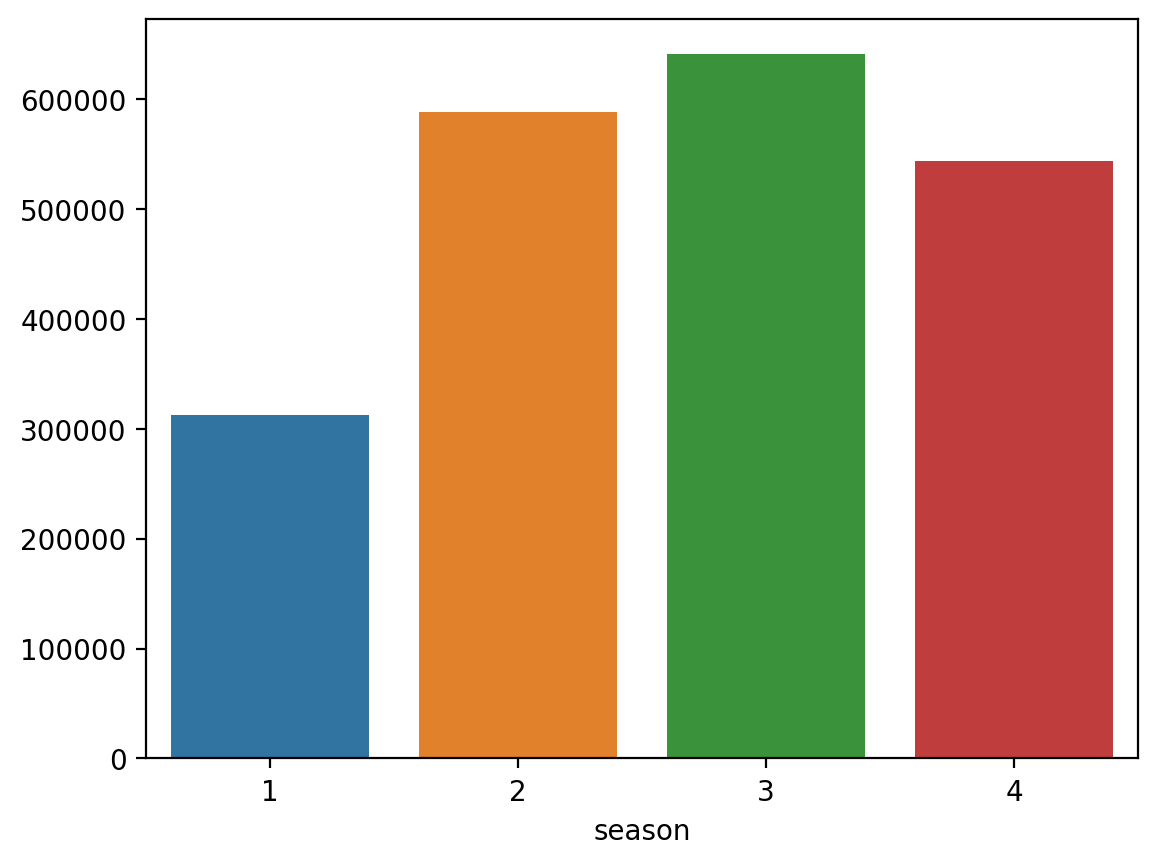

In [212]:
grouped_1 = bike_df_new.groupby("season")['count'].sum()
sns.barplot(x=grouped_1.index, y=grouped_1.values)

- holiday보다 workingday에 count가 더 높음을 확인할 수 있다

In [213]:
grouped_2 = bike_df_new.groupby("holiday")['count'].sum()
grouped_2.head()

holiday
0    2027668
1      57808
Name: count, dtype: int64

In [214]:
grouped_3 = bike_df_new.groupby("workingday")['count'].sum()
grouped_3.head()

workingday
0     654872
1    1430604
Name: count, dtype: int64

- 날씨가 맑을수록 count가 높다

<Axes: xlabel='weather'>

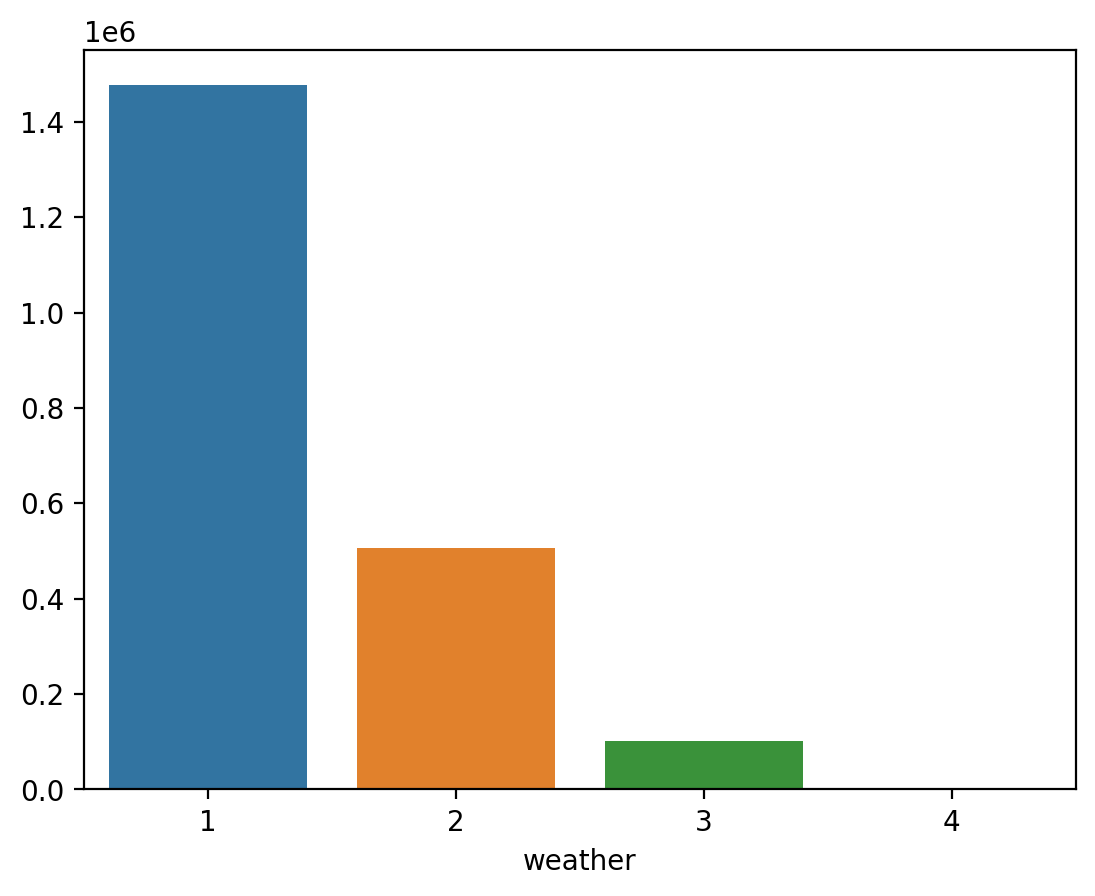

In [215]:
grouped_4 = bike_df_new.groupby("weather")['count'].sum()
sns.barplot(x=grouped_4.index, y=grouped_4.values)

- 오전 8시, 오후 5시에 count가 가장 많다

<Axes: xlabel='hour'>

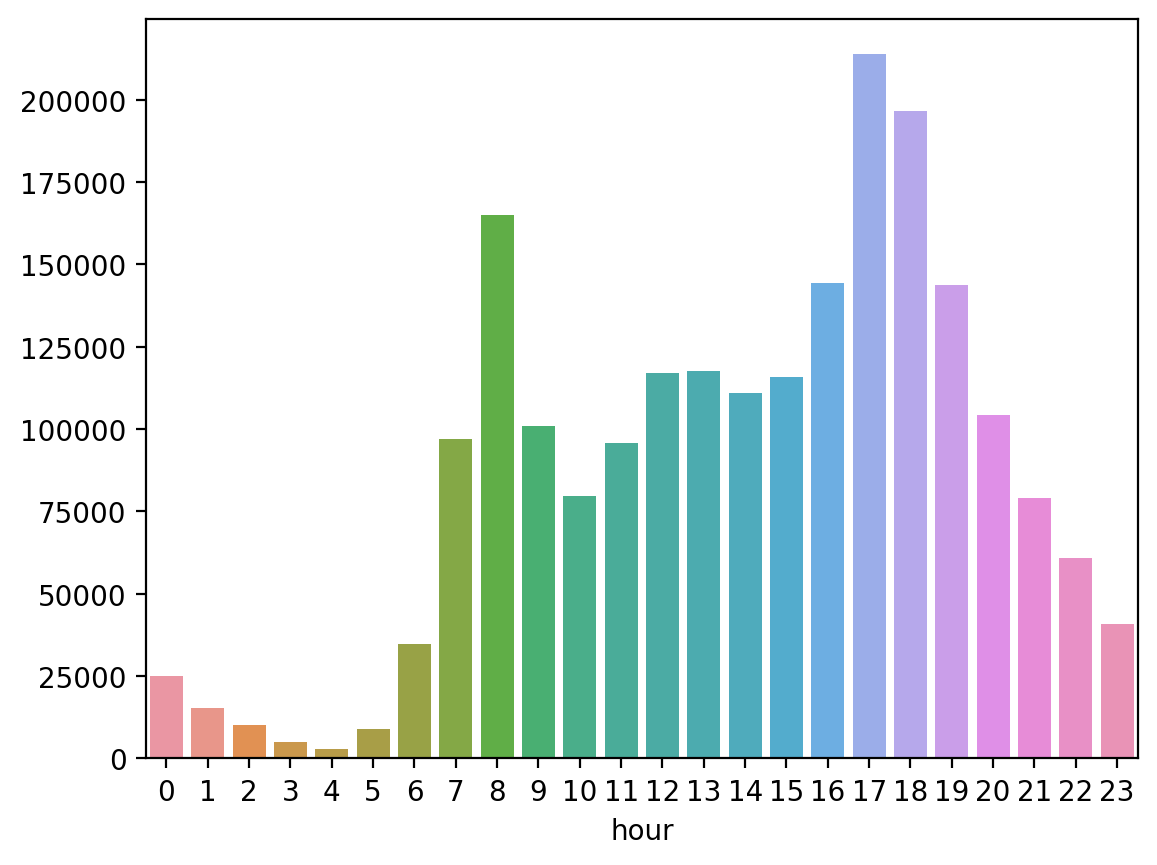

In [216]:
grouped_5 = bike_df_new.groupby("hour")['count'].sum()
sns.barplot(x=grouped_5.index, y=grouped_5.values)

- temp, atemp는 count와 관계가 있다
- temp와 atemp도 서로 관계가 있다

<Axes: xlabel='temp'>

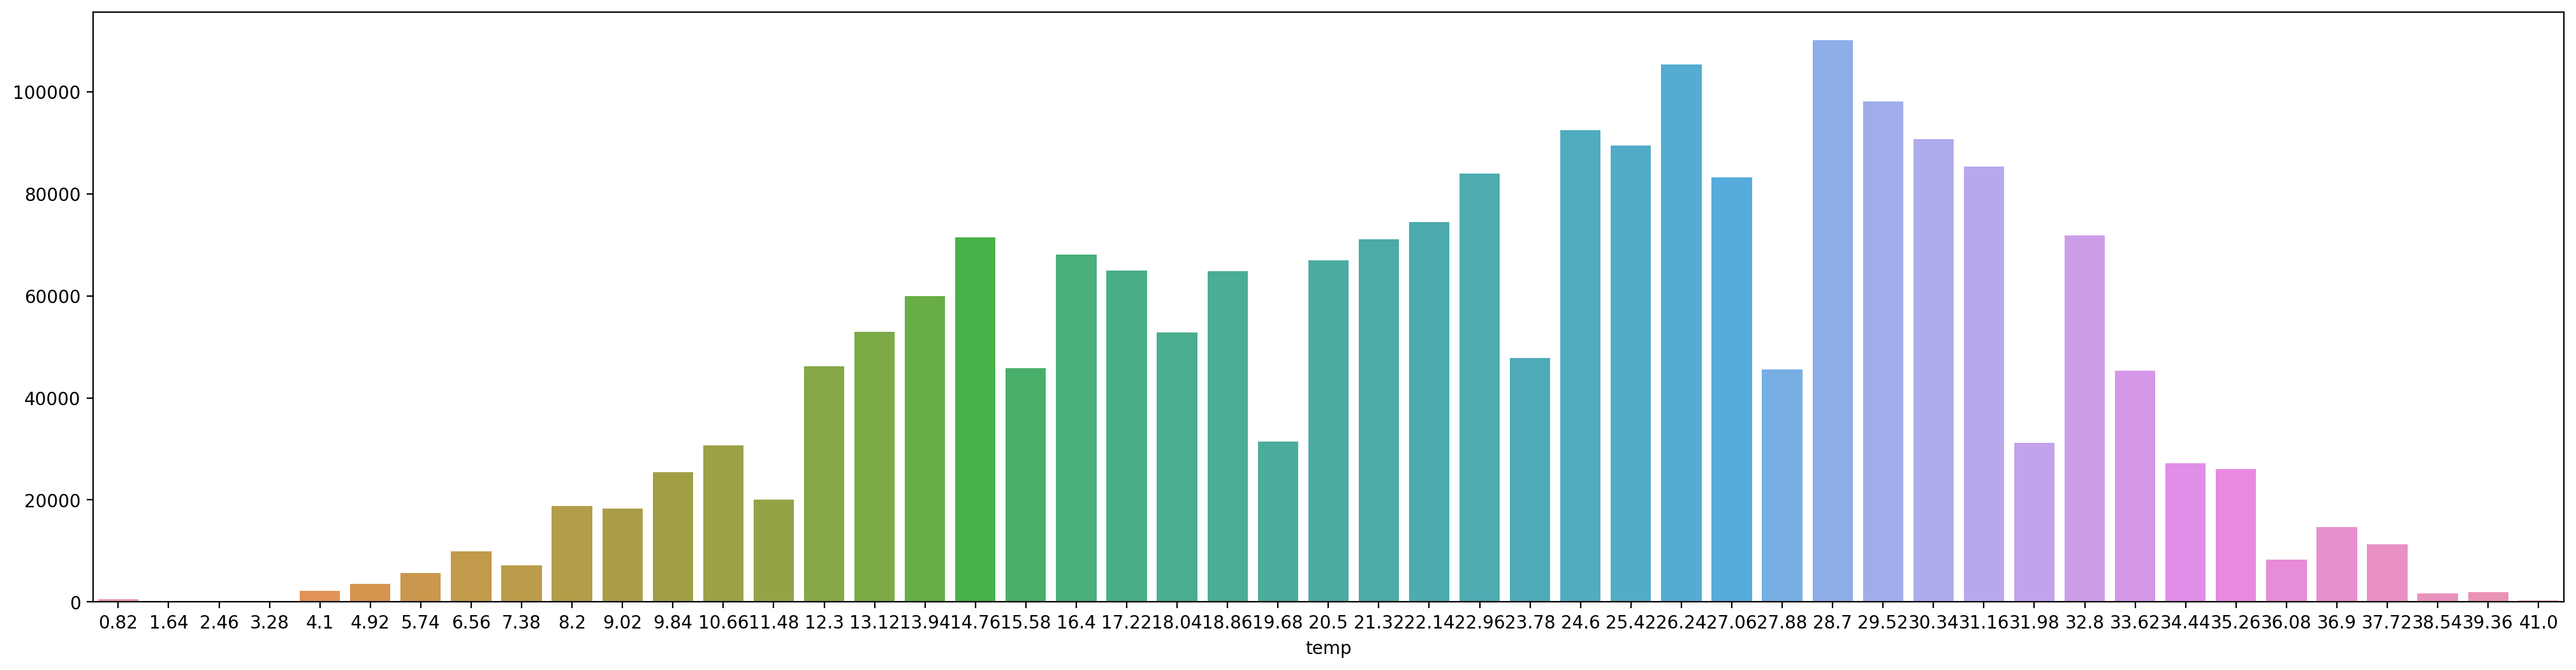

In [217]:
grouped_6 = bike_df_new.groupby("temp")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_6.index, y=grouped_6.values, ax=ax)

<Axes: xlabel='atemp'>

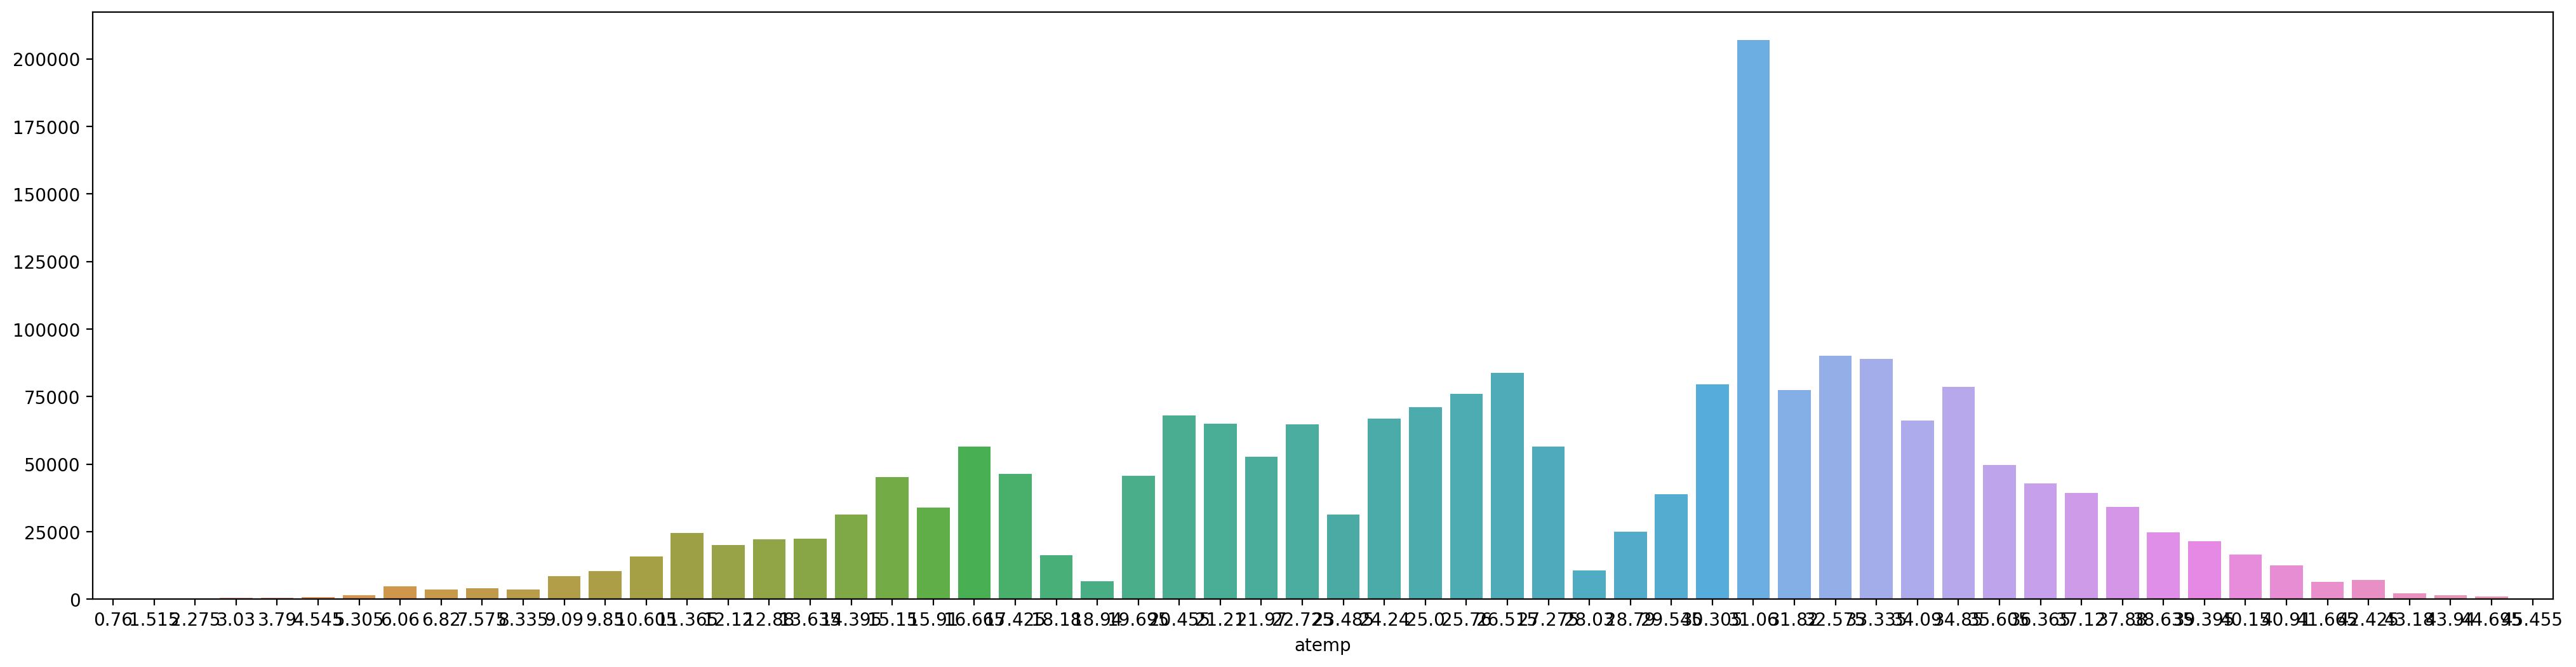

In [218]:
grouped_7 = bike_df_new.groupby("atemp")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_7.index, y=grouped_7.values, ax=ax)

<Axes: xlabel='temp', ylabel='atemp'>

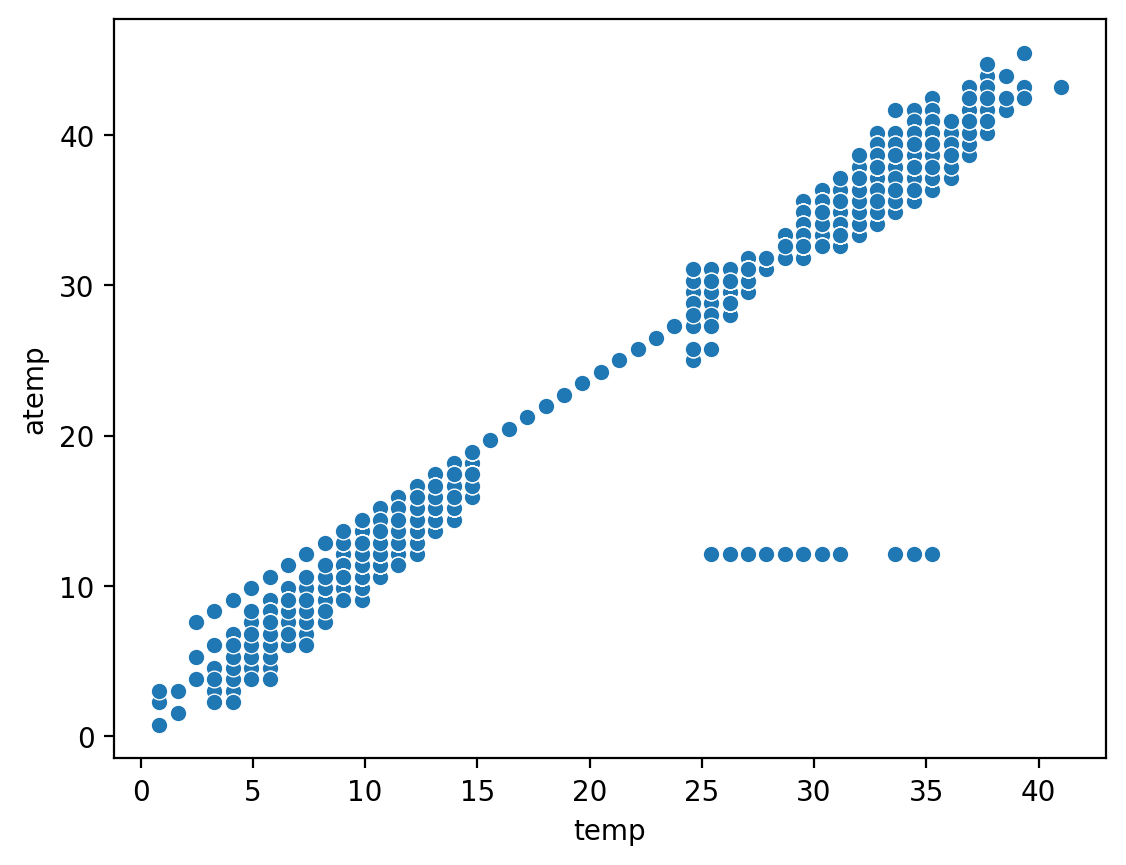

In [219]:
sns.scatterplot(x=bike_df_new['temp'], y=bike_df_new['atemp'])

- 습도와 count의 관계

<Axes: xlabel='humidity'>

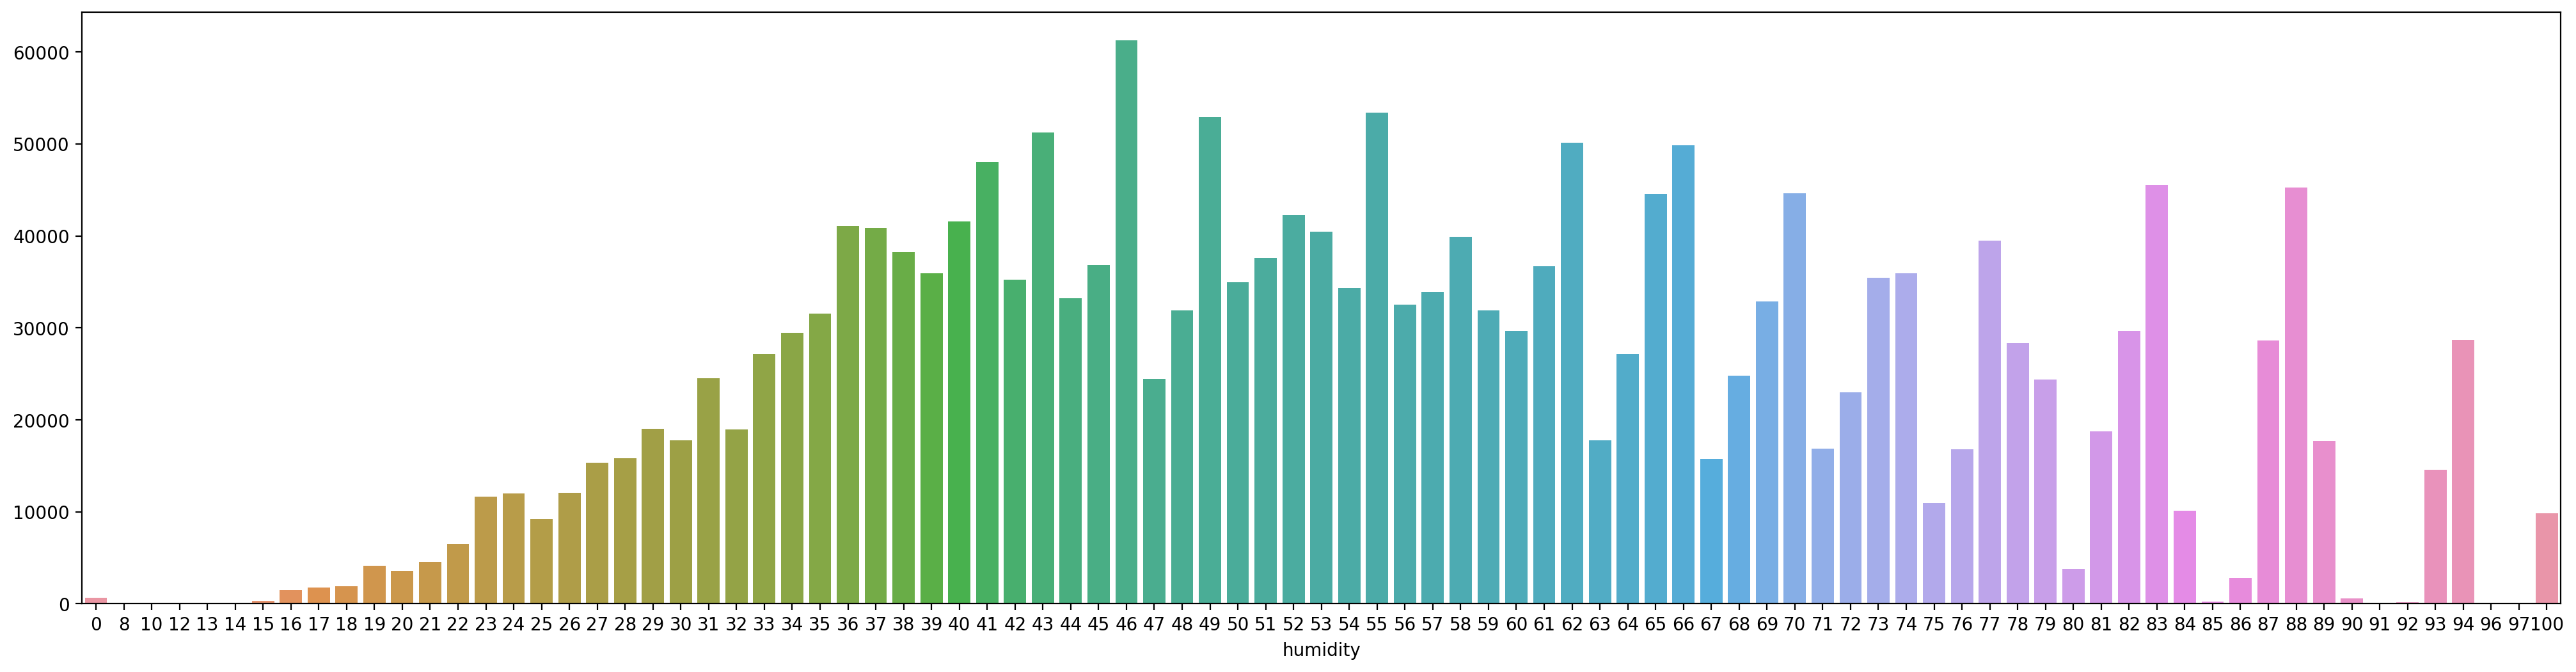

In [220]:
grouped_8 = bike_df_new.groupby("humidity")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_8.index, y=grouped_8.values, ax=ax)

- 풍속이 낮을수록 count가 높다

<Axes: xlabel='windspeed'>

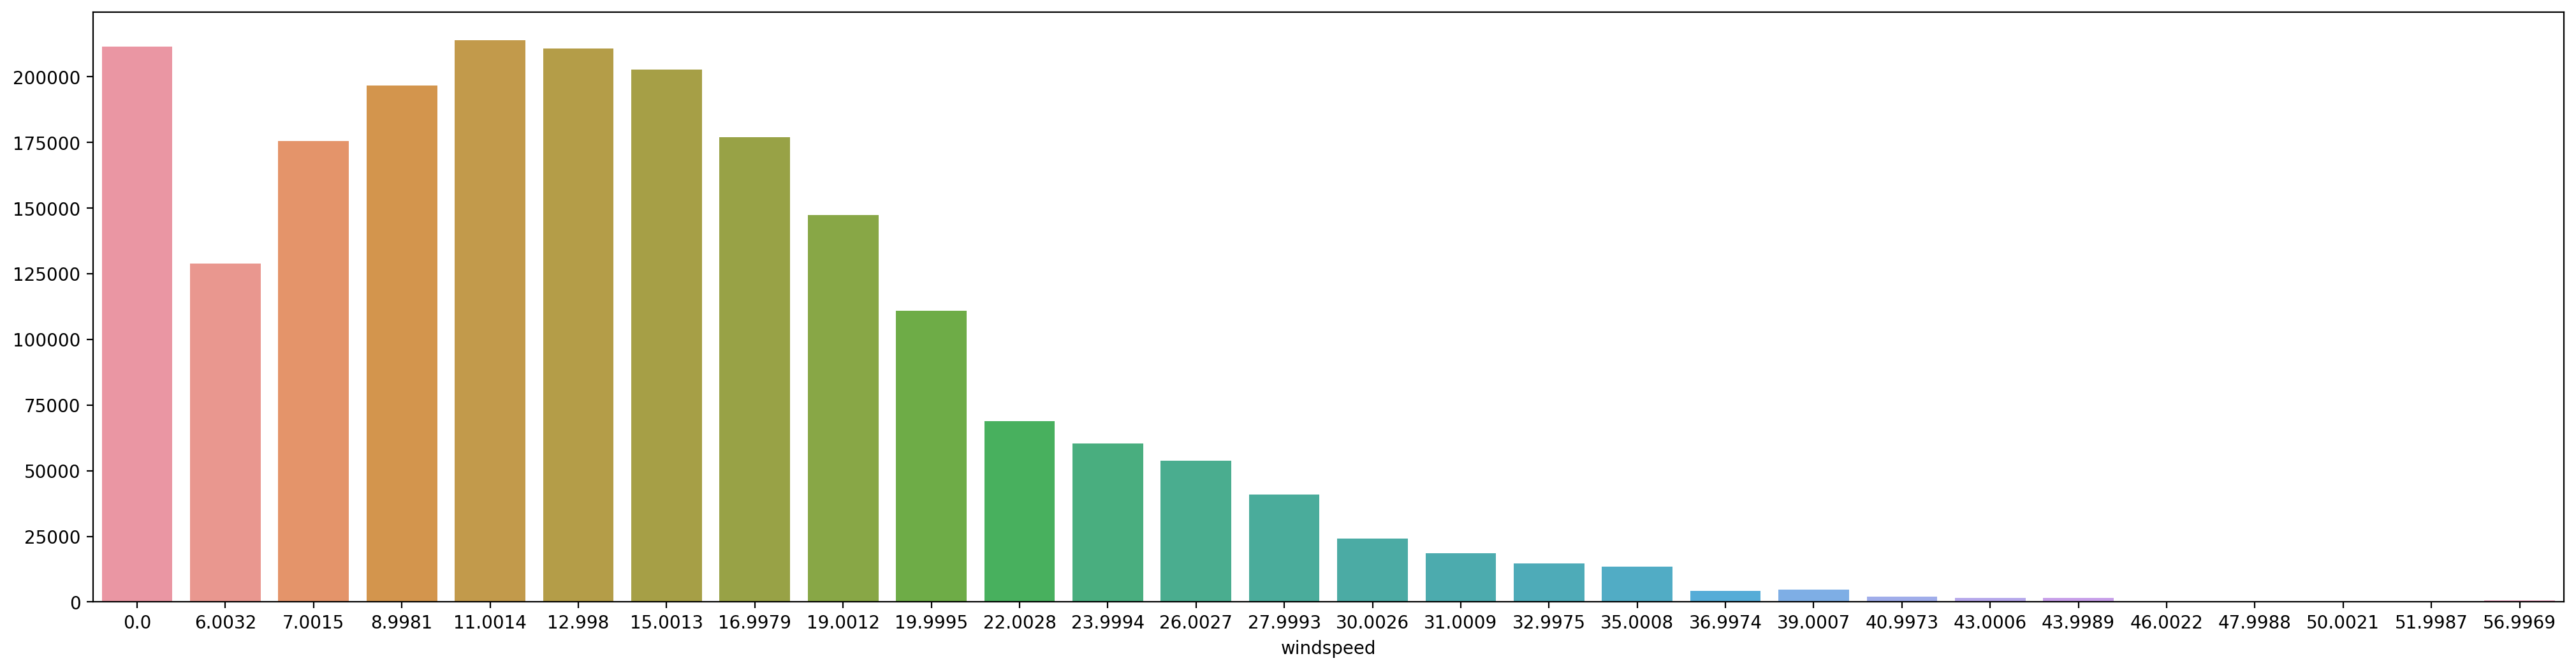

In [221]:
grouped_9 = bike_df_new.groupby("windspeed")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_9.index, y=grouped_9.values, ax=ax)

<Axes: xlabel='year'>

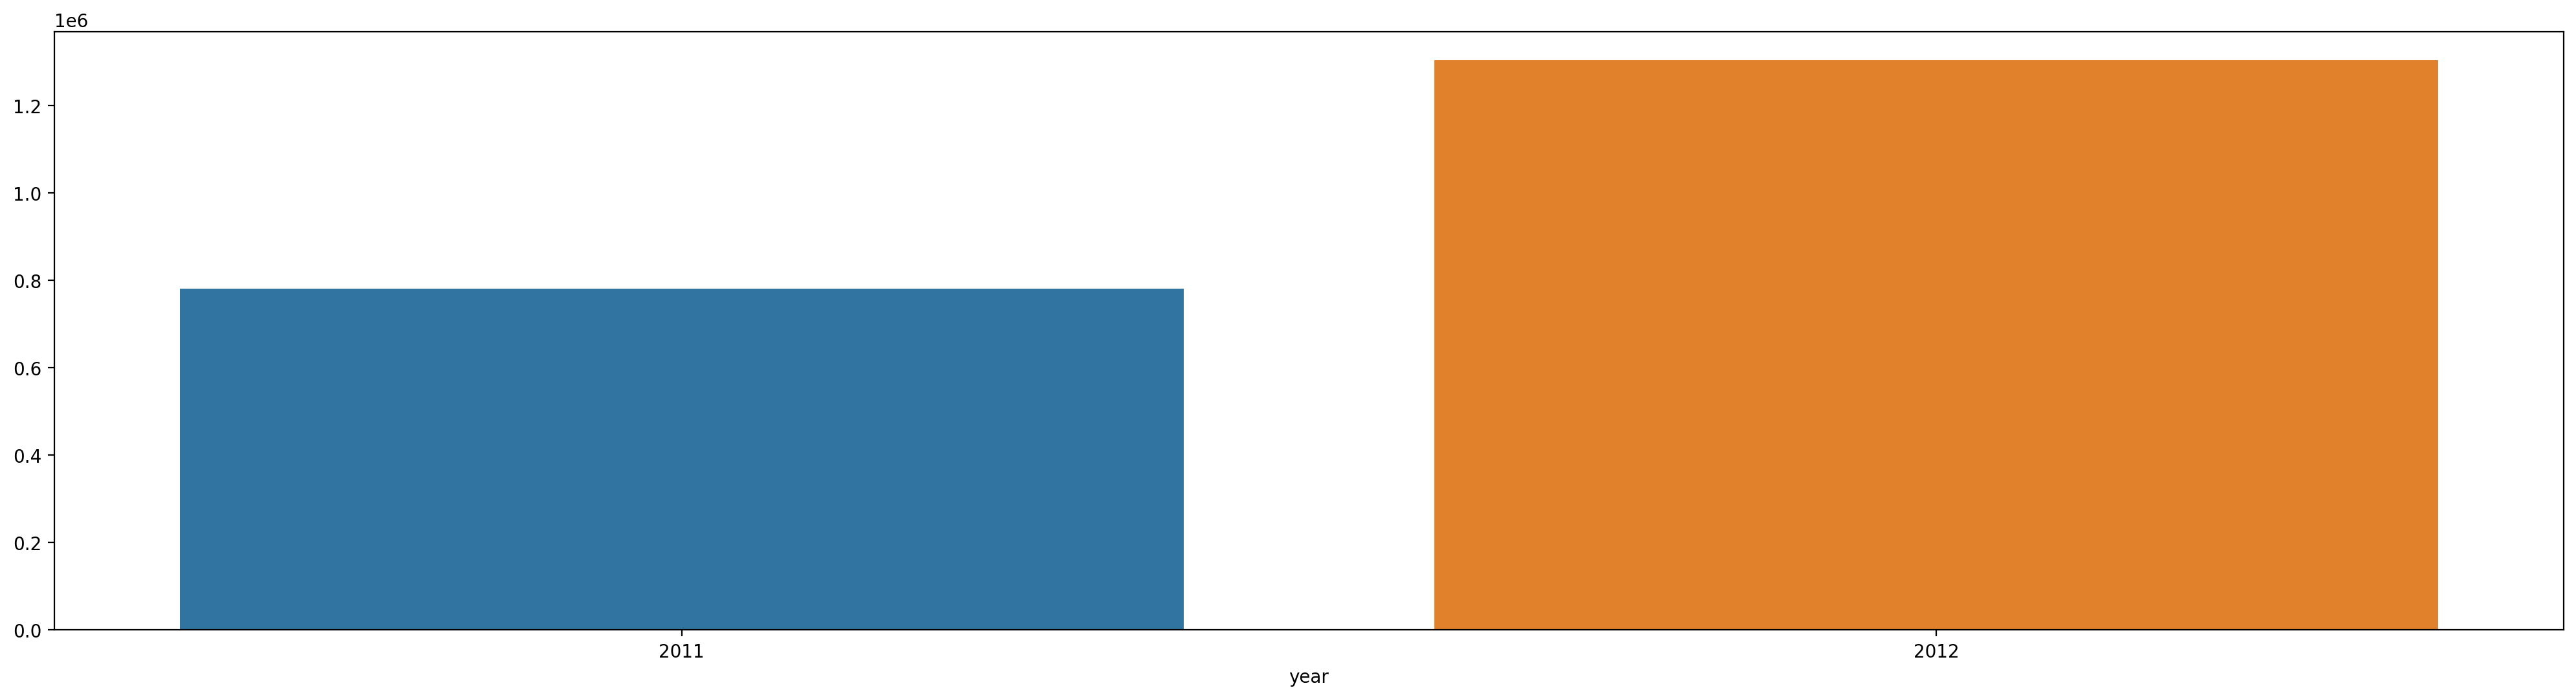

In [222]:
grouped_10 = bike_df_new.groupby("year")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_10.index, y=grouped_10.values, ax=ax)

- 앞선 분석에서 count의 총합이 가을 > 여름 > 겨울 > 봄 순이었다  
- 아래 그래프를 보면 알 수 있듯 제일 count가 높은건 여름의 6월이지만 평균은 가을이 높은 것을 확인할 수 있다

<Axes: xlabel='month'>

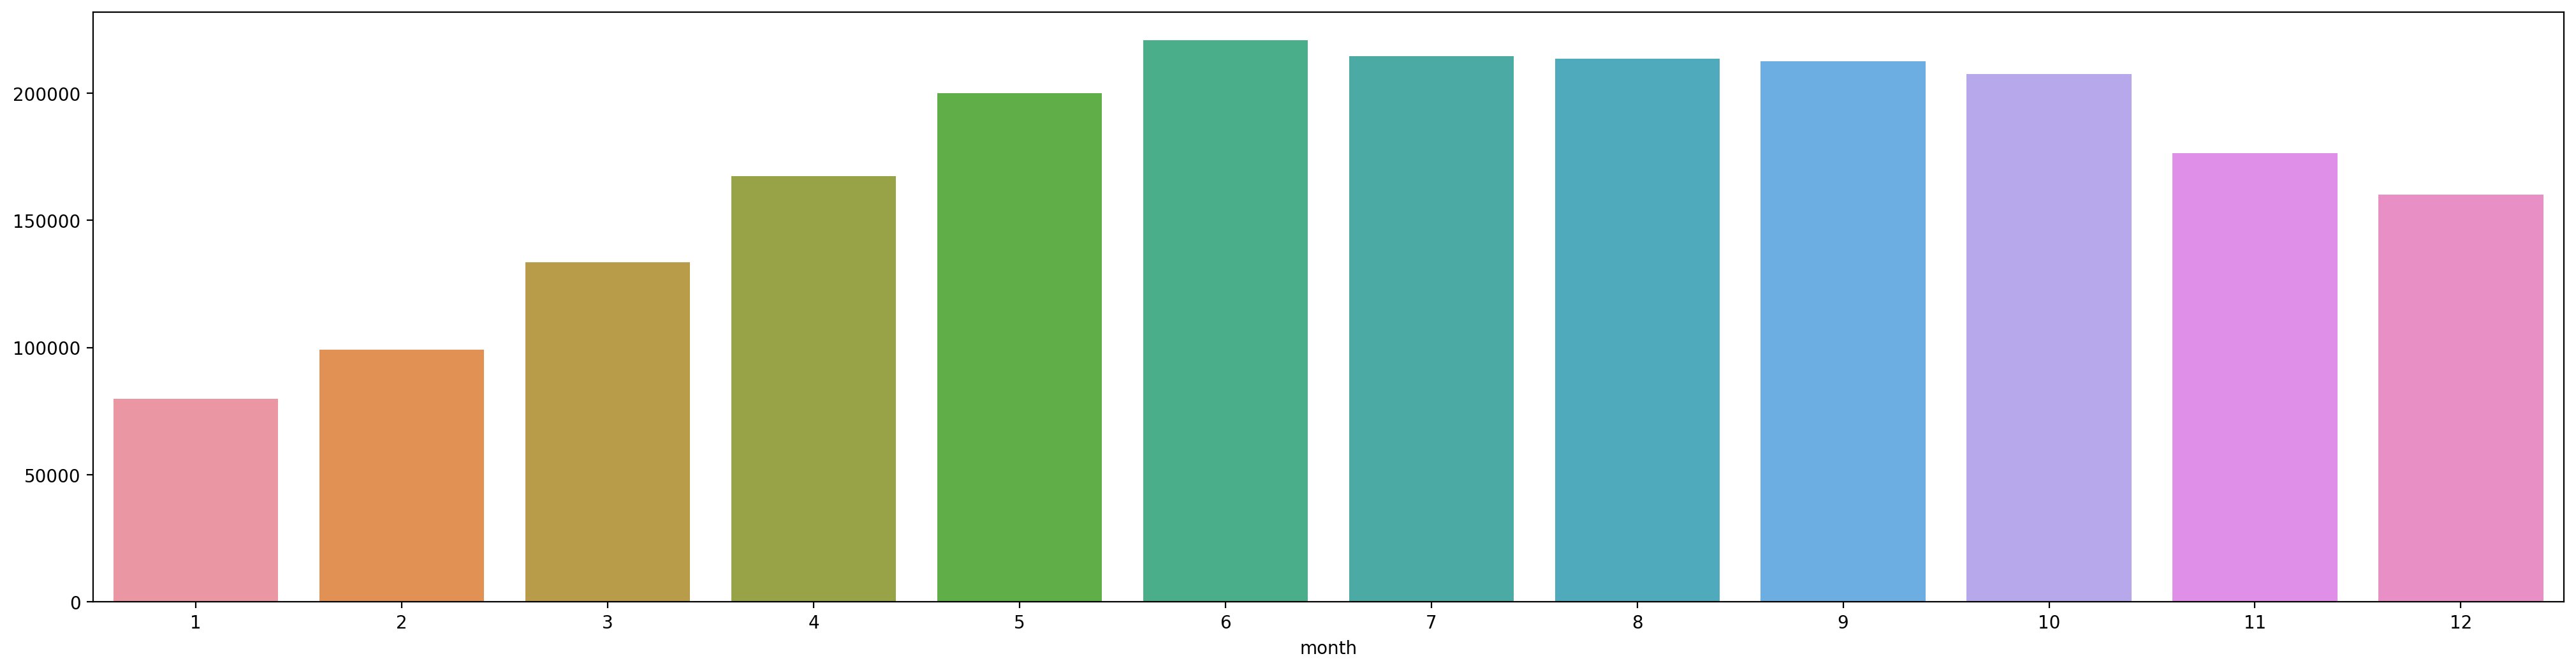

In [223]:
grouped_11 = bike_df_new.groupby("month")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_11.index, y=grouped_11.values, ax=ax)

- day는 count에 큰 영향을 주지 않는 것 같다

<Axes: xlabel='day'>

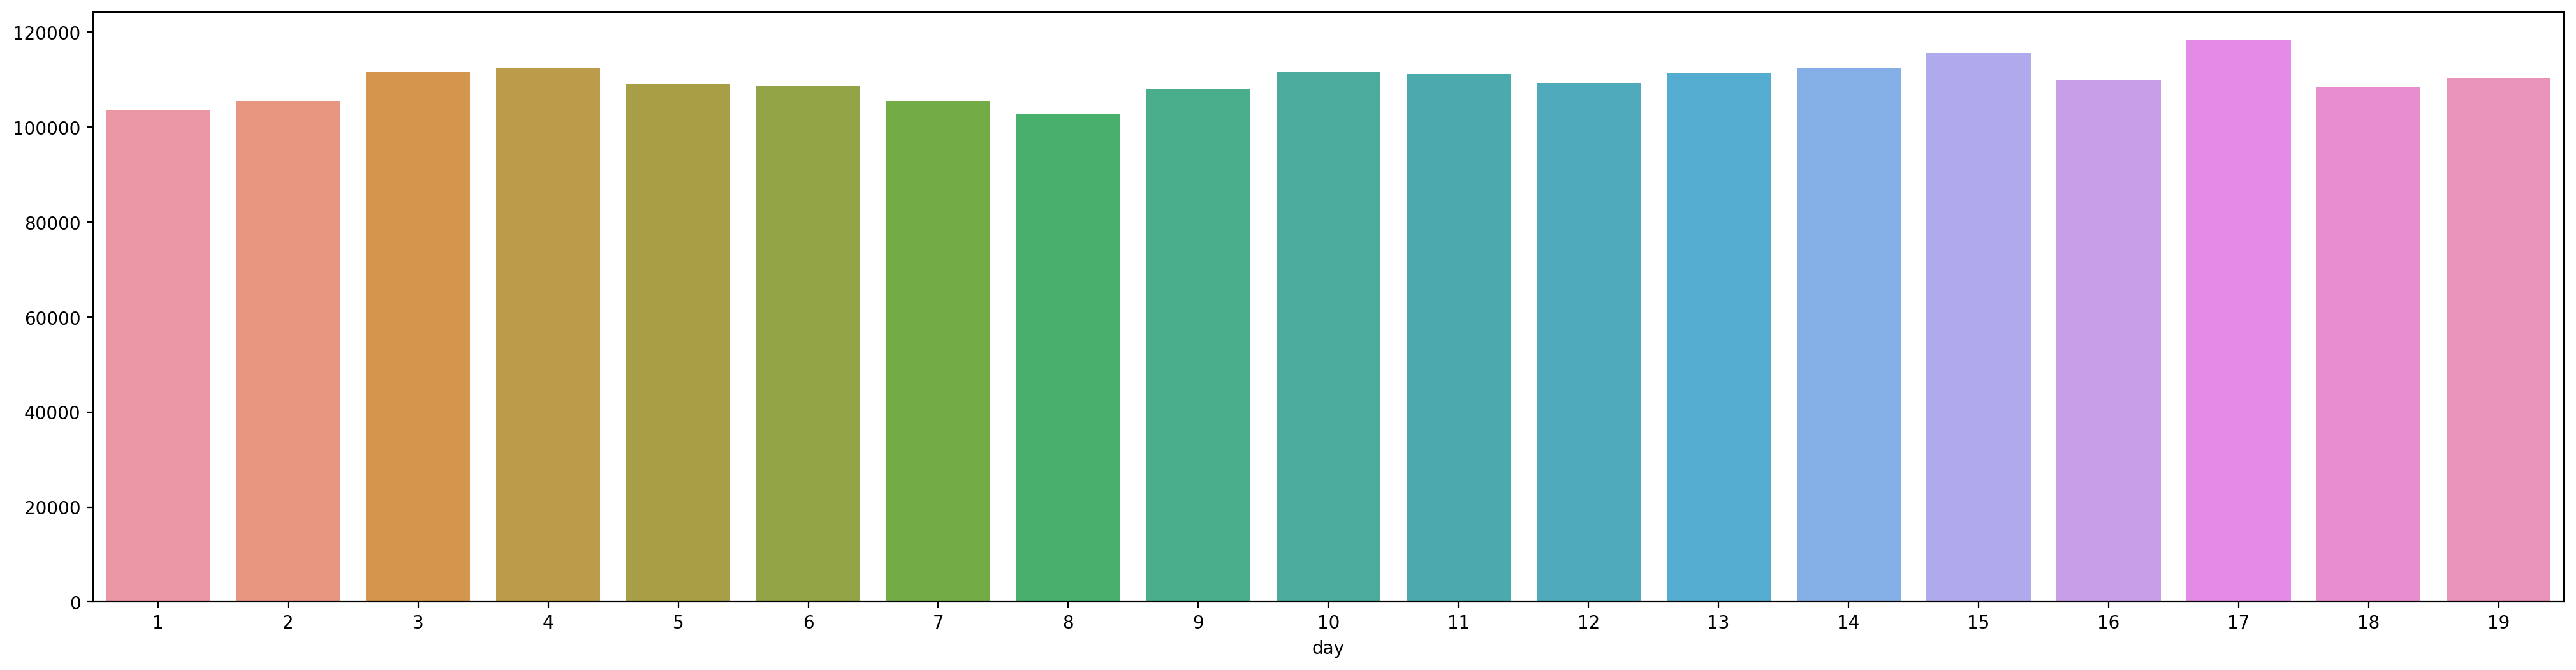

In [224]:
grouped_12 = bike_df_new.groupby("day")['count'].sum()

fig, ax = plt.subplots(figsize=(25, 6))
sns.barplot(x=grouped_12.index, y=grouped_12.values, ax=ax)

앞서 제거한 datetime, casual, registered, minute, second에 추가로 atemp, day를 제거한다

In [225]:
bike_df_new = bike_df_new.drop(['atemp', 'day'], axis=1)
bike_df_new.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour
0,1,0,0,1,9.84,81,0.0,16,2011,1,0
1,1,0,0,1,9.02,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,80,0.0,32,2011,1,2
3,1,0,0,1,9.84,75,0.0,13,2011,1,3
4,1,0,0,1,9.84,75,0.0,1,2011,1,4


year를 원 핫 인코딩 한다

In [226]:
bike_df_new = pd.get_dummies(bike_df_new, columns=['year'])
bike_df_new.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,month,hour,year_2011,year_2012
0,1,0,0,1,9.84,81,0.0,16,1,0,1,0
1,1,0,0,1,9.02,80,0.0,40,1,1,1,0
2,1,0,0,1,9.02,80,0.0,32,1,2,1,0
3,1,0,0,1,9.84,75,0.0,13,1,3,1,0
4,1,0,0,1,9.84,75,0.0,1,1,4,1,0


- count값을 맞추고자 하므로, y 변수에 count컬럼의 데이터 넣기

In [227]:
X = bike_df_new[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
                'windspeed', 'month', 'hour', 'year_2011', 'year_2012']].values
y = bike_df_new['count'].values

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

(5) LinearRegression 모델 학습

In [229]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test 입력해서 예측값 출력하기

In [230]:
predictions = model.predict(X_test)
predictions

array([162.59701141,  30.79172647, 122.90522238, ..., 109.41706836,
       161.66357243, 200.11946171])

- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기(MSE, RMSE)

In [231]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5

print(f'mse: {mse}\nrmse:{rmse}')

mse: 18328.489332185272
rmse:135.38275123583975


- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

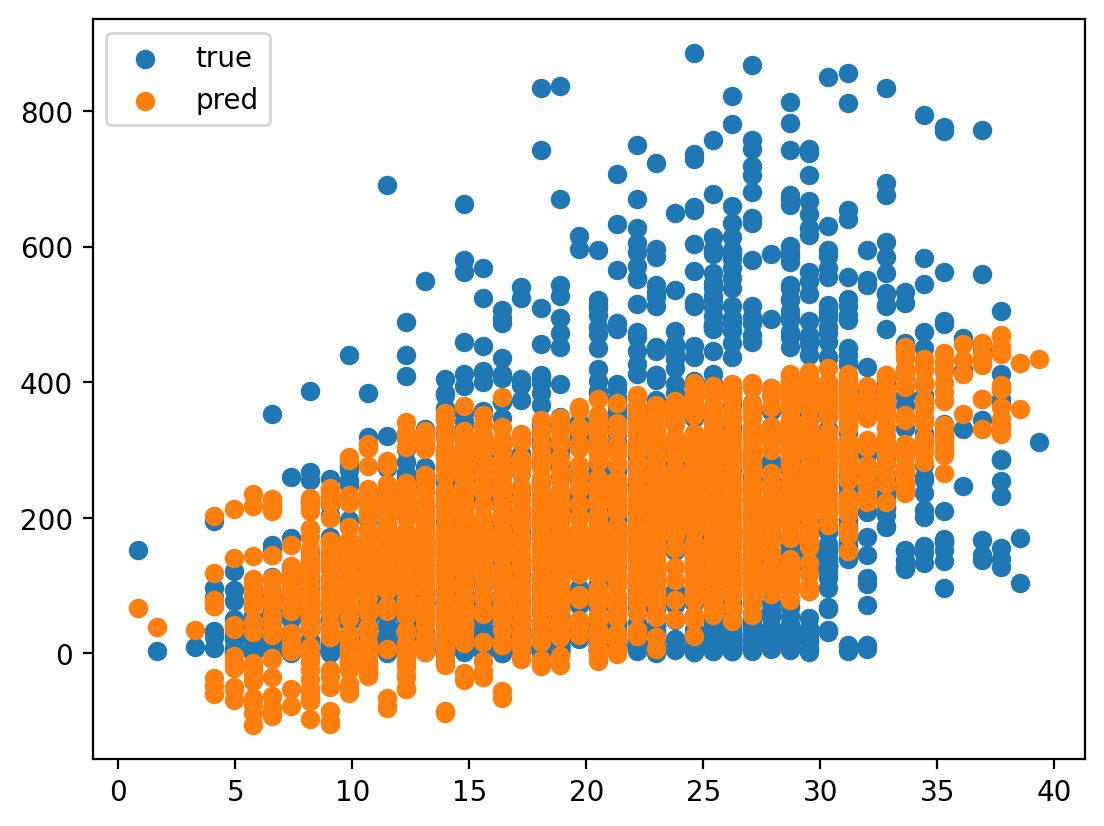

In [232]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()

- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

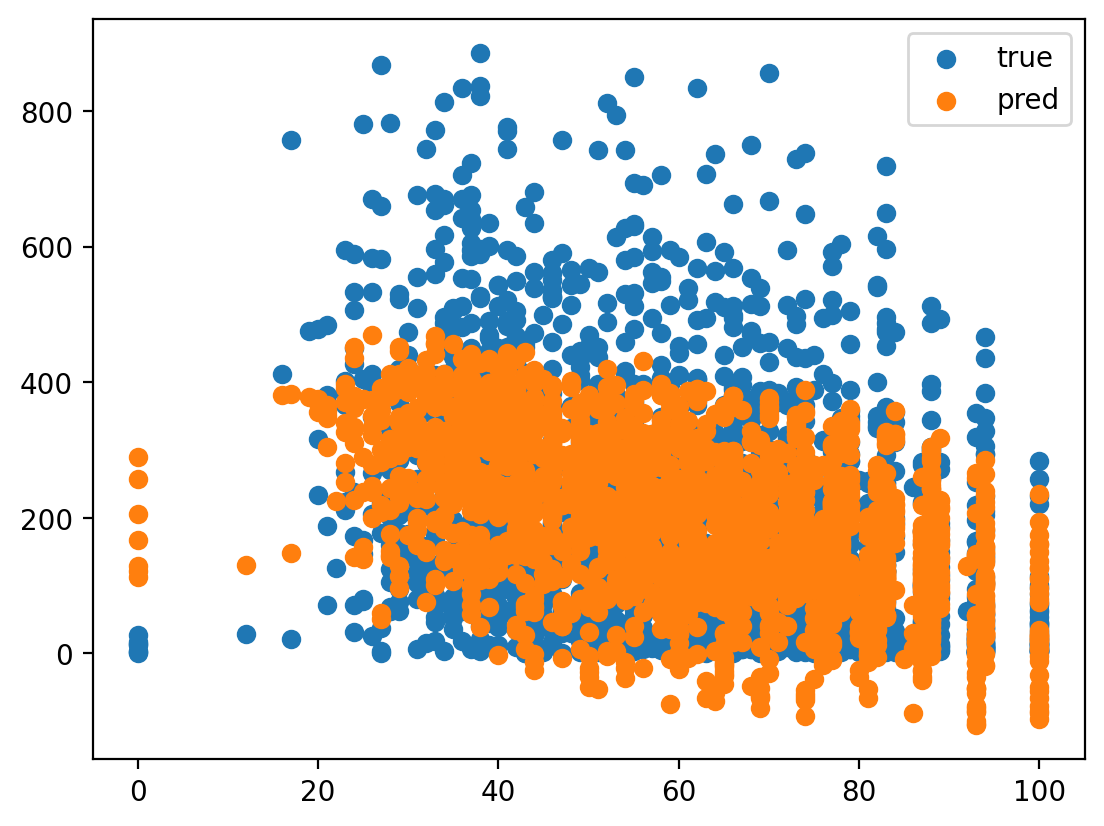

In [233]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 5], y_test, label="true")
plt.scatter(X_test[:, 5], predictions, label="pred")
plt.legend()
plt.show()